## Initial Preprocesing of NHANES dataset for around 2500 participants.

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Set directory path
import os
os.chdir("/content/drive/My Drive/COMP-5800-YDK-2020_Group1")

## Multiple Chronic Diseases Prediction

Import libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

import operator

Function to remove correlation between attributes

In [4]:
#/** Function for removing correlated attributes.
#   dataset - dataframe to find correlation in.
#   threshold - threshold for removing correlated attribute.
#**/
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    # print(dataset)
    return dataset

Function to merge datafiles.

In [5]:
#/** Function for merging the datasets.
#   filenames - names for individual file in a particular folder.
#   corrFactor - whether we want to perform correlation (0 or 1).
#**/
def merge_file(filenames, corrFactor):
    finalmergeddf = pd.DataFrame()
    for filename in filenames:
        readdf = pd.read_sas(filename)
        # If there is no sequence number column in file, avoid that file from merging.
        if 'SEQN' in readdf.columns:
            if finalmergeddf.empty:
                finalmergeddf = readdf
            else:
                if corrFactor == 1:
                    readdf = correlation(readdf, 0.9)
                    finalmergeddf = pd.merge(finalmergeddf, readdf, how = 'outer')
                else:
                    finalmergeddf = pd.merge(finalmergeddf, readdf, how = 'outer')
    return finalmergeddf

## Merging of datasets section wise.

Section 1 : Merge Demographics data

In [6]:
df_demographics = pd.read_sas('Data/Demographics/DEMO_J.XPT')

In [7]:
df_demographics.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,5.0,3.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4.0,4.0,2.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,2.0,3.0,NaN,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.397605e-79,5.397605e-79,1.000000e+00,2.0,4.0,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,2.0,NaN,1.0,1.0,NaN,15.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,1.0,2.0,2.0,1.0,5.0,5.0,5.397605e-79,5.397605e-79,1.000000e+00,1.0,4.0,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,NaN,NaN,1.0,1.0,NaN,6.0,NaN,NaN,NaN,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,7.0,7.0,5.397605e-79,3.000000e+00,5.397605e-79,1.0,3.0,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88


In [8]:
df_demographics.shape

(9254, 46)

In [9]:
df_demographics = correlation(df_demographics, 0.9)

In [10]:
df_demographics.shape

(9254, 41)

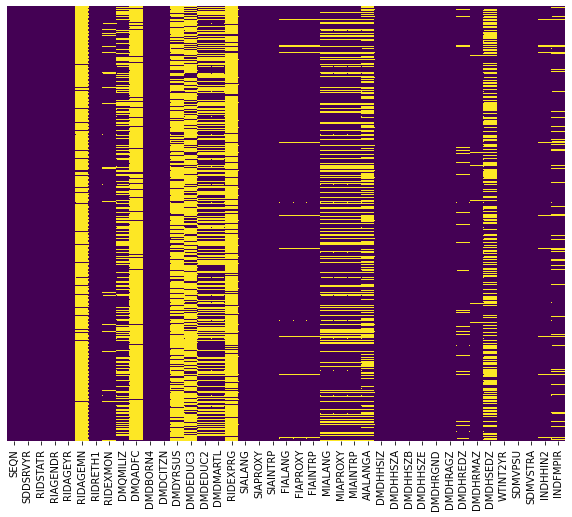

In [11]:
#Figure showing all of the null values present in the dataset for each attribute.
plt.figure(figsize=(10,8))
sns.heatmap(df_demographics.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Section 2: Merge Dietary data

In [12]:
filenames_dietary = [i for i in glob.glob('Data/Dietary/DSQ*.{}'.format('XPT'))]

In [13]:
df_dietary = merge_file(filenames_dietary, 1)
df_dietary.head()

,SEQN,DSDCOUNT,DSDANCNT,DSD010,DSD010AN,DSQTKCAL,DSQTPROT,DSQTCARB,DSQTSUGR,DSQTFIBE,DSQTTFAT,DSQTSFAT,DSQTMFAT,DSQTPFAT,DSQTCHOL,DSQTLYCO,DSQTLZ,DSQTVB1,DSQTVB2,DSQTNIAC,DSQTVB6,DSQTFA,DSQTFDFE,DSQTCHL,DSQTVB12,DSQTVC,DSQTVK,DSQTVD,DSQTCALC,DSQTPHOS,DSQTMAGN,DSQTIRON,DSQTZINC,DSQTCOPP,DSQTSODI,DSQTPOTA,DSQTSELE,DSQTCAFF,DSQTIODI,DSDPID,...,DSD128DD,DSD128EE,DSD128FF,DSD128GG,DSD128HH,DSD128II,DSD128JJ,DSD128KK,DSD128LL,DSD128MM,DSQ128NN,DSD128OO,DSD128PP,DSQ128S,RXQ215A,DSQIKCAL,DSQICARB,DSQISUGR,DSQITFAT,DSQISFAT,DSQILYCO,DSQILZ,DSQIVB1,DSQIVB2,DSQINIAC,DSQIVB6,DSQIFA,DSQICHL,DSQIVB12,DSQIVC,DSQIVK,DSQIVD,DSQICALC,DSQIPHOS,DSQIMAGN,DSQIIRON,DSQIZINC,DSQICOPP,DSQISELE,DSQIIODI
0,93703.0,1.000000e+00,5.397605e-79,1.0,2.0,8.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,167.0,284.0,NaN,3.00,20.00,NaN,7.500,NaN,NaN,NaN,NaN,1.3500,NaN,NaN,NaN,NaN,NaN,21.0,18558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,167.0,NaN,3.0,20.0,NaN,7.5,NaN,NaN,NaN,NaN,1.35,NaN,NaN,21.0
1,93704.0,5.397605e-79,5.397605e-79,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,8.000000e+00,5.397605e-79,1.0,2.0,26.0,NaN,7.0,3.0,3.0,0.11,NaN,NaN,NaN,NaN,300.0,250.0,35.39,8.923,31.1,4.22,645.0,1096.0,1.111,114.22,616.67,10.0,20.557,211.67,48.0,100.0,0.733,15.8333,2.0,5.0,110.0,21.4,NaN,150.0,276.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93705.0,8.000000e+00,5.397605e-79,1.0,2.0,26.0,NaN,7.0,3.0,3.0,0.11,NaN,NaN,NaN,NaN,300.0,250.0,35.39,8.923,31.1,4.22,645.0,1096.0,1.111,114.22,616.67,10.0,20.557,211.67,48.0,100.0,0.733,15.8333,2.0,5.0,110.0,21.4,NaN,150.0,596.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93705.0,8.000000e+00,5.397605e-79,1.0,2.0,26.0,NaN,7.0,3.0,3.0,0.11,NaN,NaN,NaN,NaN,300.0,250.0,35.39,8.923,31.1,4.22,645.0,1096.0,1.111,114.22,616.67,10.0,20.557,211.67,48.0,100.0,0.733,15.8333,2.0,5.0,110.0,21.4,NaN,150.0,642.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_dietary = df_dietary.groupby('SEQN').max().reset_index()

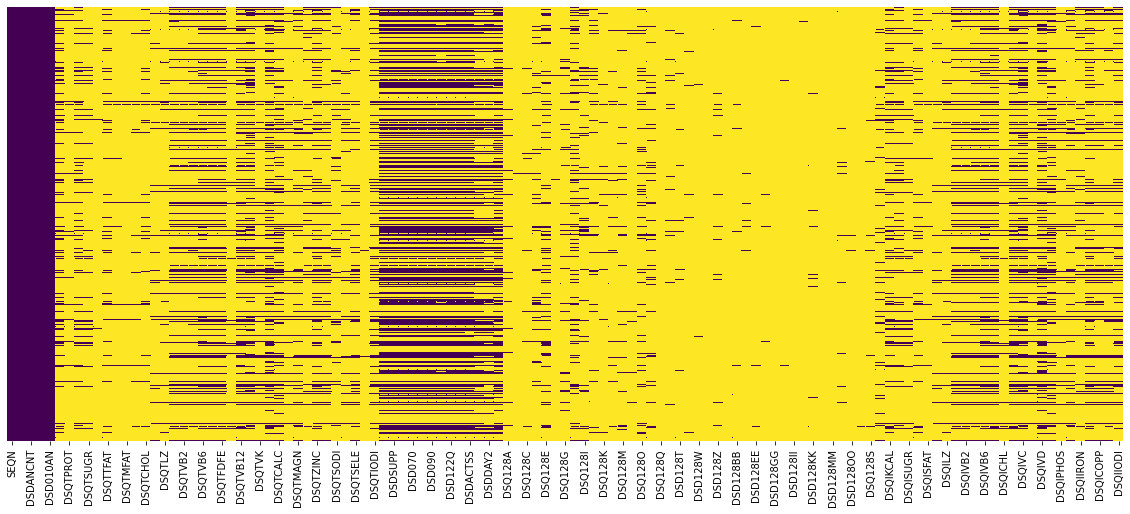

In [15]:
#Figure showing all of the null values present in the dataset for each attribute.
plt.figure(figsize=(20,8))
sns.heatmap(df_dietary.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df_dietary.shape

(9254, 117)

Section 3: Merge Examination Data

In [17]:
filenames_examination = [i for i in glob.glob('Data/Examination/*.{}'.format('XPT'))]

In [18]:
df_examination = merge_file(filenames_examination, 0)

In [19]:
df_examination.head()

,SEQN,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,BPXDI1,BPAEN1,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,BMXBMI,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,...,OHX12RSC,OHX13RSC,OHX14RSC,OHX15RSC,OHX18RSC,OHX19RSC,OHX20RSC,OHX21RSC,OHX22RSC,OHX23RSC,OHX24RSC,OHX25RSC,OHX26RSC,OHX27RSC,OHX28RSC,OHX29RSC,OHX30RSC,OHX31RSC,OHXRCAR,OHXRCARO,OHXRRES,OHXRRESO,OHX02SE,OHX03SE,OHX04SE,OHX05SE,OHX07SE,OHX10SE,OHX12SE,OHX13SE,OHX14SE,OHX15SE,OHX18SE,OHX19SE,OHX20SE,OHX21SE,OHX28SE,OHX29SE,OHX30SE,OHX31SE
0,93703.0,NaN,120.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13.7,3.0,89.6,NaN,NaN,NaN,88.6,NaN,17.5,NaN,NaN,18.0,NaN,16.2,NaN,48.2,NaN,NaN,...,b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',NaN,NaN,NaN,NaN,b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b''
1,93704.0,NaN,114.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13.9,NaN,95.0,NaN,NaN,NaN,94.2,NaN,15.7,NaN,NaN,18.6,NaN,15.2,NaN,50.0,NaN,NaN,...,b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',NaN,NaN,NaN,NaN,b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b''
2,93705.0,NaN,NaN,1.0,4.0,52.0,1.0,1.0,220.0,NaN,NaN,NaN,NaN,NaN,NaN,202.0,62.0,2.0,198.0,74.0,2.0,1.0,79.5,NaN,NaN,NaN,NaN,NaN,158.3,NaN,31.7,37.0,NaN,36.0,NaN,32.0,NaN,101.8,NaN,110.0,...,b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',2.0,2.0,2.0,2.0,b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b''
3,93706.0,NaN,NaN,1.0,3.0,82.0,1.0,1.0,140.0,112.0,74.0,2.0,114.0,70.0,2.0,108.0,76.0,2.0,NaN,NaN,NaN,1.0,66.3,NaN,NaN,NaN,NaN,NaN,175.7,NaN,21.5,46.6,NaN,38.8,NaN,27.0,NaN,79.3,NaN,94.4,...,b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',2.0,2.0,2.0,2.0,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,93707.0,NaN,NaN,1.0,2.0,100.0,1.0,1.0,140.0,128.0,38.0,2.0,128.0,46.0,2.0,128.0,58.0,2.0,NaN,NaN,NaN,1.0,45.4,NaN,NaN,NaN,NaN,NaN,158.4,NaN,18.1,38.1,NaN,33.8,NaN,21.5,NaN,64.1,NaN,83.0,...,b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',NaN,NaN,NaN,NaN,b'9',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'9',b'9',b'0',b'0',b'9',b'0',b'9',b'0',b'9'


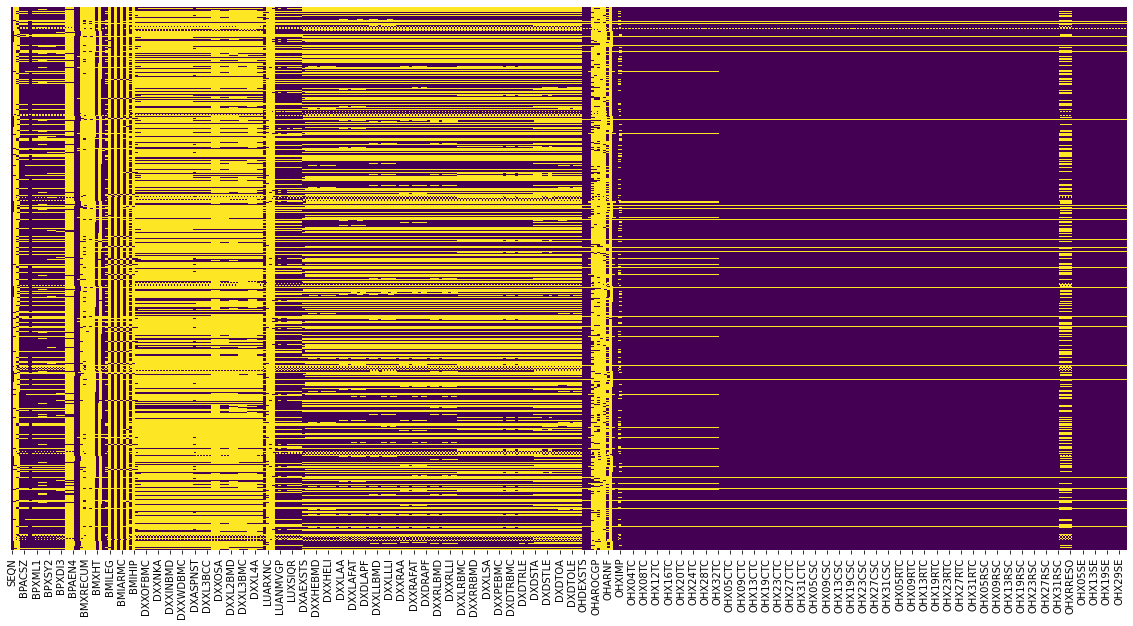

In [20]:
#Figure showing all of the null values present in the dataset for each attribute.
plt.figure(figsize=(20,10))
sns.heatmap(df_examination.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Section 4: Merge Laboratory Data

In [21]:
filenames_laboratory = [i for i in glob.glob('Data/Laboratory/*.{}'.format('XPT'))]

In [22]:
df_laboratory = merge_file(filenames_laboratory, 1)

In [23]:
df_laboratory.head()

,SEQN,URXUMA,URXUMS,URDUMALC,URXUCR,URXCRS,URDUCRLC,URDACT,LBDHDD,LBXTC,LBXBCR,LBDBCRLC,LBXBCO,LBDBCOLC,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXMCVSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,LBXNRBC,LBXCOT,LBDCOTLC,LBXHCT,LBDHCTLC,LBXIGG,LBXIGM,LBXIGGA,PHQ020,...,LBDBGMLC,LBXGLU,LBXSATSI,LBDSATLC,LBXSAL,LBXSAPSI,LBXSASSI,LBXSC3SI,LBXSBU,LBXSCLSI,LBXSCK,LBXSCR,LBXSGB,LBXSGL,LBXSGTSI,LBDSGTLC,LBXSIR,LBXSLDSI,LBXSOSSI,LBXSPH,LBXSKSI,LBXSNASI,LBXSTB,LBDSTBLC,LBXSCA,LBXSCH,LBXSTP,LBXSTR,LBXSUA,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDTIME3,URXPREG,LBXVIC,LBDVICLC
0,93705.0,3.2,3.2,5.397605e-79,24.0,2121.6,5.397605e-79,13.33,60.0,157.0,0.29,1.000000e+00,0.20,5.397605e-79,8.6,40.0,7.4,48.8,2.9,1.0,0.6,4.2,0.2,1.000000e-01,5.48,11.9,67.0,32.4,15.6,309.0,7.9,5.397605e-79,0.028,5.397605e-79,0.020,5.397605e-79,NaN,NaN,NaN,2.0,...,1.000000e+00,NaN,16.0,5.397605e-79,4.4,74.0,20.0,31.0,11.0,100.0,166.0,0.92,2.9,85.0,21.0,5.397605e-79,94.0,174.0,280.0,4.0,4.0,141.0,0.6,5.397605e-79,9.2,157.0,7.3,95.0,5.8,248.0,1.204,206.0,NaN,NaN,NaN,NaN,NaN,NaN,1.300,5.397605e-79
1,93706.0,39.6,39.6,5.397605e-79,69.0,6099.6,5.397605e-79,57.39,47.0,148.0,NaN,NaN,NaN,NaN,6.1,24.6,9.1,61.4,4.3,0.8,0.6,3.7,0.3,5.397605e-79,5.24,16.3,89.7,34.7,12.2,233.0,6.6,5.397605e-79,0.138,5.397605e-79,0.024,5.397605e-79,NaN,NaN,NaN,2.0,...,5.397605e-79,NaN,10.0,5.397605e-79,4.4,79.0,14.0,28.0,12.0,104.0,114.0,0.81,2.7,94.0,16.0,5.397605e-79,163.0,142.0,286.0,4.0,4.4,144.0,0.7,5.397605e-79,9.6,149.0,7.1,92.0,8.0,349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.120,5.397605e-79
2,93707.0,41.6,41.6,5.397605e-79,209.0,18475.6,5.397605e-79,19.90,68.0,189.0,NaN,NaN,NaN,NaN,11.2,37.1,6.2,54.7,1.6,0.5,0.7,6.1,0.2,1.000000e-01,5.02,14.5,83.9,34.4,13.6,348.0,8.5,2.000000e-01,0.555,5.397605e-79,0.070,5.397605e-79,NaN,NaN,NaN,2.0,...,1.000000e+00,NaN,13.0,5.397605e-79,5.2,238.0,24.0,22.0,17.0,97.0,342.0,0.64,2.8,115.0,9.0,5.397605e-79,90.0,177.0,276.0,4.3,3.3,137.0,0.7,5.397605e-79,10.1,199.0,8.0,110.0,5.5,100.0,0.526,190.0,NaN,NaN,NaN,NaN,NaN,NaN,0.483,5.397605e-79
3,93708.0,9.1,9.1,5.397605e-79,47.0,4154.8,5.397605e-79,19.36,88.0,209.0,0.29,1.000000e+00,0.16,5.397605e-79,6.0,31.3,6.8,59.4,2.0,0.7,0.4,3.6,0.1,5.397605e-79,4.59,13.2,86.8,33.1,13.4,226.0,9.1,2.000000e-01,0.011,1.000000e+00,0.011,1.000000e+00,NaN,NaN,NaN,2.0,...,5.397605e-79,122.0,19.0,5.397605e-79,3.9,66.0,21.0,27.0,16.0,104.0,347.0,0.58,3.2,116.0,22.0,5.397605e-79,96.0,247.0,289.0,3.3,4.4,144.0,0.5,5.397605e-79,9.5,210.0,7.1,72.0,4.5,15.0,0.500,30.0,102.0,1.545,66.0,NaN,NaN,NaN,1.520,5.397605e-79
4,93709.0,26.4,26.4,5.397605e-79,215.0,19006.0,5.397605e-79,12.28,65.0,176.0,0.70,5.397605e-79,0.34,5.397605e-79,7.2,25.8,6.8,66.1,0.8,0.6,0.5,4.8,0.1,5.397605e-79,5.13,15.4,88.8,33.8,15.7,228.0,9.0,5.397605e-79,54.300,5.397605e-79,0.628,5.397605e-79,NaN,NaN,NaN,2.0,...,NaN,NaN,15.0,5.397605e-79,3.7,86.0,17.0,24.0,20.0,100.0,63.0,1.32,3.3,96.0,31.0,5.397605e-79,66.0,NaN,284.0,3.5,4.1,141.0,0.3,5.397605e-79,9.9,180.0,7.0,132.0,6.2,11.0,0.107,103.0,14.0,0.184,76.0,NaN,NaN,NaN,0.427,5.397605e-79


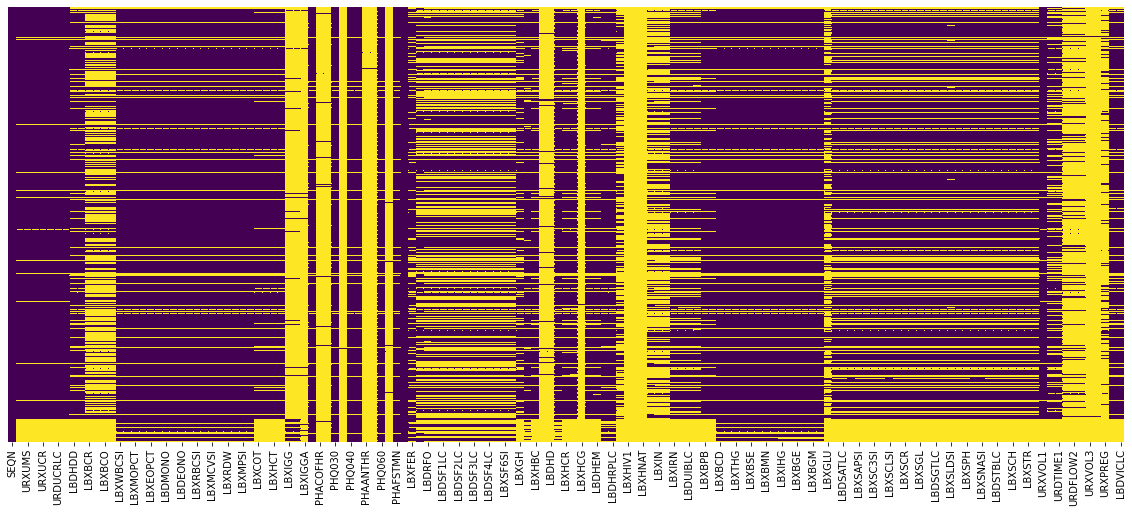

In [24]:
#Figure showing all of the null values present in the dataset for each attribute.
plt.figure(figsize=(20,8))
sns.heatmap(df_laboratory.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
df_laboratory.shape

(8366, 145)

Section 5: Merge Questionnaire Data

In [26]:
filenames_questionnaire = [i for i in glob.glob('Data/Questionnaire/*.{}'.format('XPT'))]

In [27]:
df_questionnaire = merge_file(filenames_questionnaire, 1)

In [28]:
df_questionnaire = correlation(df_questionnaire, 0.9)

In [29]:
df_questionnaire = df_questionnaire.groupby('SEQN').max().reset_index()

In [30]:
df_questionnaire.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,AUQ054,AUQ060,AUQ070,AUQ080,AUQ090,AUQ400,AUQ410A,AUQ410B,AUQ410C,AUQ410D,AUQ410E,AUQ410F,AUQ410G,AUQ410H,AUQ410I,AUQ410J,AUQ156,AUQ420,AUQ430,AUQ139,AUQ144,AUQ147,AUQ149A,AUQ149B,AUQ149C,AUQ153,AUQ630,AUQ440,AUQ450A,AUQ450B,AUQ450C,AUQ450D,AUQ450E,AUQ450F,...,SMQ874,SMQ876,SMQ878,SMQ880,SMQ940,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ060,WHQ070,WHD080A,WHD080B,WHD080C,WHD080D,WHD080E,WHD080F,WHD080G,WHD080H,WHD080I,WHD080J,WHD080K,WHD080M,WHD080N,WHD080O,WHD080P,WHD080Q,WHD080R,WHD080S,WHD080T,WHD080U,WHD080L,WHQ225,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ190
0,93703.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,2.0,NaN,2.0,63.0,165.0,1.0,3.0,165.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,150.0,130.0,63.0,170.0,62.0,2.0
3,93706.0,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,1.0,1.0,1.0,68.0,145.0,3.0,3.0,145.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,150.0,17.0,2.0
4,93707.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,6.0,...,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


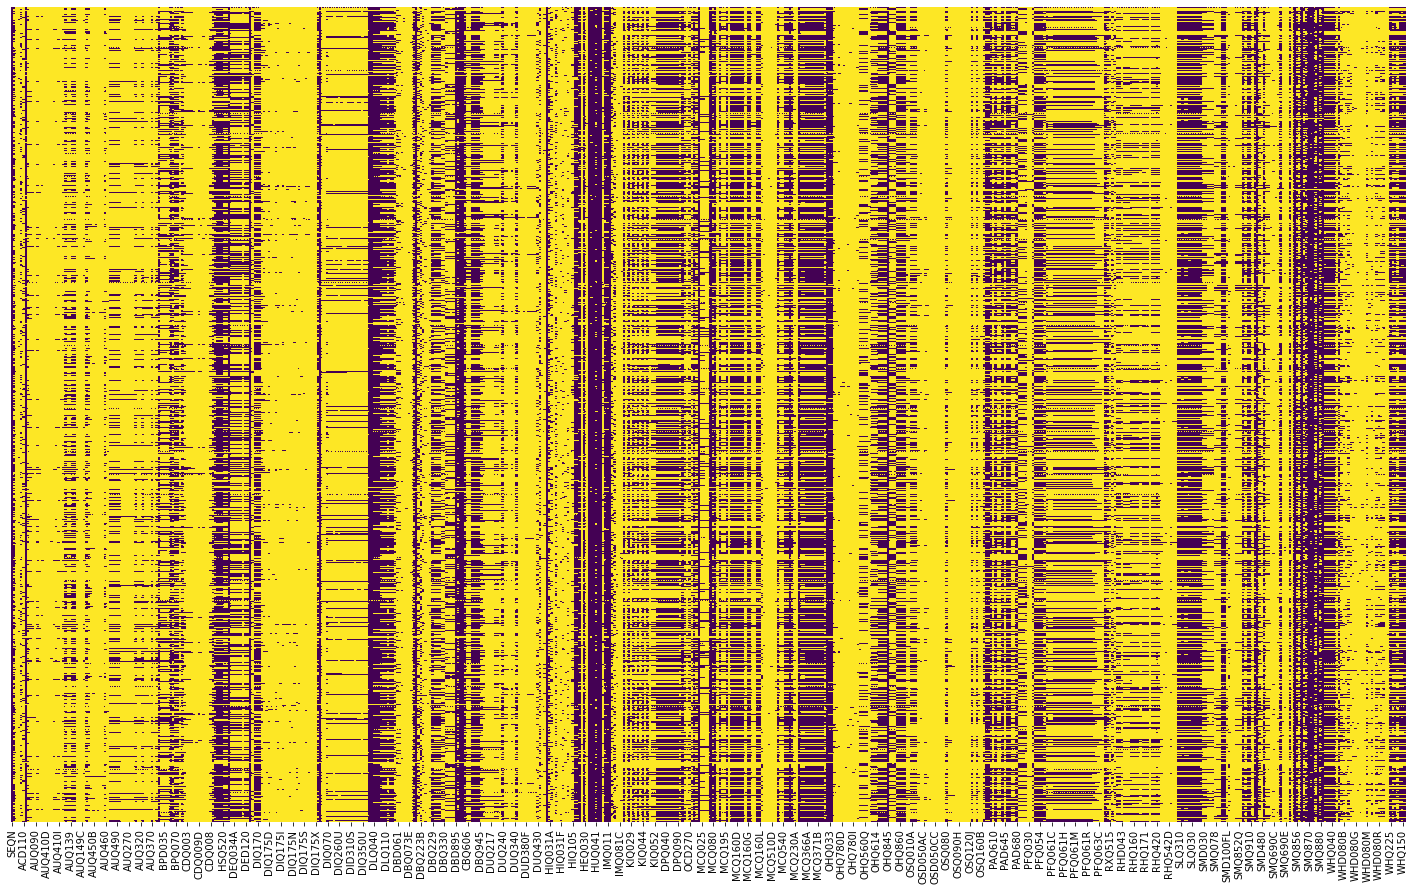

In [31]:
#Figure showing all of the null values present in the dataset for each attribute.
plt.figure(figsize=(25,15))
sns.heatmap(df_questionnaire.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Section 6: Medication data

In [32]:
df_medication = pd.read_sas('Data/Medication/RXQ_RX_J.XPT')

In [33]:
df_medication.head()

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,93703.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN
1,93704.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN
2,93705.0,1.0,b'ENALAPRIL; HYDROCHLOROTHIAZIDE',b'd03740',1.0,5475.0,b'I10',b'',b'',b'Essential (primary) hypertension',b'',b'',3.0
3,93705.0,1.0,b'MELOXICAM',b'd04532',1.0,61.0,b'M06.9',b'',b'',"b'Rheumatoid arthritis, unspecified'",b'',b'',3.0
4,93705.0,1.0,b'OMEPRAZOLE',b'd00325',1.0,3650.0,b'R12',b'',b'',b'Heartburn',b'',b'',3.0


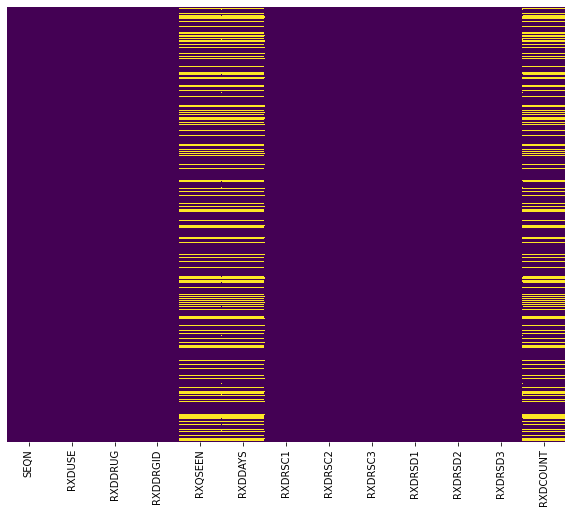

In [34]:
#Figure showing all of the null values present in the dataset for each attribute.
plt.figure(figsize=(10,8))
sns.heatmap(df_medication.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Questionnaire dataset : Drugs available in the market.

In [35]:
total_drugs = pd.read_sas('Data/Questionnaire/RXQ_DRUG.xpt')

In [36]:
total_drugs.head()

,RXDDRGID,RXDDRUG,RXDINGFL,RXDDCI1A,RXDDCI1B,RXDDCI1C,RXDDCI2A,RXDDCI2B,RXDDCI2C,RXDDCI3A,RXDDCI3B,RXDDCI3C,RXDDCI4A,RXDDCI4B,RXDDCI4C,RXDICI1A,RXDICI1B,RXDICI1C,RXDICI2A,RXDICI2B,RXDICI2C,RXDICI3A,RXDICI3B,RXDICI3C,RXDICI4A,RXDICI4B,RXDICI4C,RXDICI5A,RXDICI5B,RXDICI5C,RXDICI6A,RXDICI6B,RXDICI6C,RXDDCN1A,RXDDCN1B,RXDDCN1C,RXDDCN2A,RXDDCN2B,RXDDCN2C,RXDDCN3A,RXDDCN3B,RXDDCN3C,RXDDCN4A,RXDDCN4B,RXDDCN4C,RXDICN1A,RXDICN1B,RXDICN1C,RXDICN2A,RXDICN2B,RXDICN2C,RXDICN3A,RXDICN3B,RXDICN3C,RXDICN4A,RXDICN4B,RXDICN4C,RXDICN5A,RXDICN5B,RXDICN5C,RXDICN6A,RXDICN6B,RXDICN6C
0,b'a10061',b'BILE SALTS; PANCREATIN; PEPSIN',2.0,87.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,91.0,NaN,87.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'GASTROINTESTINAL AGENTS',b'MISCELLANEOUS GI AGENTS',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'GASTROINTESTINAL AGENTS',b'DIGESTIVE ENZYMES',b'',b'GASTROINTESTINAL AGENTS',b'GALLSTONE SOLUBILIZING AGENTS',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b''
1,b'a10129',b'CALCIUM IODIDE; CODEINE',2.0,122.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,58.0,60.0,105.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'RESPIRATORY AGENTS',b'ANTITUSSIVES',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'CENTRAL NERVOUS SYSTEM AGENTS',b'ANALGESICS',b'NARCOTIC ANALGESICS',b'MISCELLANEOUS AGENTS',b'MISCELLANEOUS UNCATEGORIZED AGENTS',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b''
2,b'a10899',b'ESTRADIOL; ESTRIOL; ESTRONE',2.0,97.0,101.0,187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,101.0,183.0,97.0,101.0,187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'HORMONES/HORMONE MODIFIERS',b'SEX HORMONES',b'MISCELLANEOUS SEX HORMONES',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'HORMONES/HORMONE MODIFIERS',b'SEX HORMONES',b'ESTROGENS',b'HORMONES/HORMONE MODIFIERS',b'SEX HORMONES',b'MISCELLANEOUS SEX HORMONES',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b''
3,b'a10900',b'ESTRADIOL; ESTRIOL',2.0,97.0,101.0,187.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,101.0,183.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'HORMONES/HORMONE MODIFIERS',b'SEX HORMONES',b'MISCELLANEOUS SEX HORMONES',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'HORMONES/HORMONE MODIFIERS',b'SEX HORMONES',b'ESTROGENS',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b''
4,b'a11077',b'HYDROCHLOROTHIAZIDE; LABETALOL',2.0,40.0,55.0,472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,47.0,275.0,40.0,49.0,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'CARDIOVASCULAR AGENTS',b'ANTIHYPERTENSIVE COMBINATIONS',b'BETA BLOCKERS WITH THIAZIDES',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'CARDIOVASCULAR AGENTS',b'BETA-ADRENERGIC BLOCKING AGENTS',"b'BETA BLOCKERS, NON-CARDIOSELECTIVE'",b'CARDIOVASCULAR AGENTS',b'DIURETICS',b'THIAZIDE AND THIAZIDE-LIKE DIURETICS',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b'',b''


In [37]:
total_drugs.shape

(1513, 63)

# Preprocessing of sectional datasets

Imputation of null values for demographics dataset.

In [38]:
df_demographics.isnull().sum()

SEQN           0
SDDSRVYR       0
RIDSTATR       0
RIAGENDR       0
RIDAGEYR       0
RIDAGEMN    8657
RIDRETH1       0
RIDEXMON     550
DMQMILIZ    3250
DMQADFC     8693
DMDBORN4       0
DMDCITZN       3
DMDYRSUS    7306
DMDEDUC3    6948
DMDEDUC2    3685
DMDMARTL    3685
RIDEXPRG    8144
SIALANG        0
SIAPROXY       0
SIAINTRP       0
FIALANG      474
FIAPROXY     474
FIAINTRP     474
MIALANG     2570
MIAPROXY    2570
MIAINTRP    2570
AIALANGA    4277
DMDHHSIZ       0
DMDHHSZA       0
DMDHHSZB       0
DMDHHSZE       0
DMDHRGND       0
DMDHRAGZ       0
DMDHREDZ     490
DMDHRMAZ     191
DMDHSEDZ    4503
WTINT2YR       0
SDMVPSU        0
SDMVSTRA       0
INDHHIN2     491
INDFMPIR    1231
dtype: int64

In [39]:
##### Removed unnecessary variables with the missing data #####
# RIDAGEMN - Age in months of the participant at the time of screening.(we already have the age in years.)
# RIDEXMON - Six month time period when the examination was performed - two cat: Nov 1 through Apr 30, May 1 through Oct 31.
# DMQMILIZ - Have you ever served on active duty in the U.S. Armed Forces, military Reserves, or National Guard.
# DMQADFC - Did you ever serve in a foreign country during a time of armed conflict/a humanitarian/peace-keeping mission?
# DMDCITZN - Are you a citizen of United States?
# DMDYRSUS - Length of time the participant has been in the US.
# DMDEDUC3 - What is the highest grade or level of school you have completed.
# DMDEDUC2 - What is the highest grade or level of school you have completed.
# DMDMARTL - Marital Status
# RIDEXPRG - Pregnancy status for females between 20 and 44 years of age at the time of MEC exam.
# FIALANG - Language of the Family Interview Instrument
# FIAPROXY - Was a Proxy respondent used in conducting the Family Interview?
# FIAINTRP - Was an interpreter used to conduct the Family interview?
# MIALANG - Language of the MEC CAPI Interview Instrument
# MIAPROXY - Was a Proxy respondent used in conducting the MEC CAPI Interview?
# MIAINTRP - Was an interpreter used to conduct the MEC CAPI interview?
# AIALANGA - Language of the MEC ACASI Interview Instrument
# DMDHREDZ - HH reference person's education level
# DMDHRMAZ - HH reference person's marital status
# DMDHSEDZ - HH reference person's spouse's education level
# INDHHIN2 - Total household income (in dollars)
# INDFMPIR - A ratio of family income to poverty guidelines.

In [40]:
# Dropping null value columns as they are unnessary for the analysis.
null_demoCol = df_demographics.columns[df_demographics.isnull().any()]

In [41]:
df_demographics.drop(null_demoCol, axis=1, inplace=True)

In [42]:
df_demographics.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,DMDBORN4,SIALANG,SIAPROXY,SIAINTRP,DMDHHSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGZ,WTINT2YR,SDMVPSU,SDMVSTRA
0,93703.0,10.0,2.0,2.0,2.0,5.0,1.0,1.0,1.0,2.0,5.0,3.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,9246.491865,2.0,145.0
1,93704.0,10.0,2.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,4.0,2.000000e+00,5.397605e-79,5.397605e-79,1.0,2.0,37338.768343,1.0,143.0
2,93705.0,10.0,2.0,2.0,66.0,4.0,1.0,1.0,2.0,2.0,1.0,5.397605e-79,5.397605e-79,1.000000e+00,2.0,4.0,8614.571172,2.0,145.0
3,93706.0,10.0,2.0,1.0,18.0,5.0,1.0,1.0,2.0,2.0,5.0,5.397605e-79,5.397605e-79,1.000000e+00,1.0,4.0,8548.632619,2.0,134.0
4,93707.0,10.0,2.0,1.0,13.0,5.0,1.0,1.0,1.0,2.0,7.0,5.397605e-79,3.000000e+00,5.397605e-79,1.0,3.0,6769.344567,1.0,138.0


In [43]:
# RIAGENDR - Gender
# RIDAGEYR - Age in years at screening
# RIDRETH1 - Race/Hispanic origin
# DMDHHSIZ - Total number of people in the Household

imp_demoCol = ['SEQN','RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDHHSIZ']

In [44]:
df_demographics = df_demographics[imp_demoCol]

In [45]:
df_demographics.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDHHSIZ
0,93703.0,2.0,2.0,5.0,5.0
1,93704.0,1.0,2.0,3.0,4.0
2,93705.0,2.0,66.0,4.0,1.0
3,93706.0,1.0,18.0,5.0,5.0
4,93707.0,1.0,13.0,5.0,7.0


Imputation of null values in Dietary dataset.

In [46]:
null_dietCol = df_dietary.columns[df_dietary.columns.str.contains(r'DSQ128|DSD128')].tolist()
df_dietary[null_dietCol] = df_dietary[null_dietCol].fillna(0)

In [47]:
df_dietary.drop(df_dietary.columns[df_dietary.isnull().sum() > 500], axis=1, inplace=True)

In [48]:
df_dietary.head()

,SEQN,DSDCOUNT,DSDANCNT,DSD010,DSD010AN,DSQ128A,DSQ128B,DSQ128C,DSQ128D,DSQ128E,DSQ128F,DSQ128G,DSQ128H,DSQ128I,DSQ128J,DSQ128K,DSQ128L,DSQ128M,DSQ128N,DSQ128O,DSQ128P,DSQ128Q,DSQ128R,DSD128T,DSD128V,DSD128W,DSD128X,DSD128Z,DSD128AA,DSD128BB,DSD128DD,DSD128EE,DSD128FF,DSD128GG,DSD128HH,DSD128II,DSD128JJ,DSD128KK,DSD128LL,DSD128MM,DSQ128NN,DSD128OO,DSD128PP,DSQ128S
0,93703.0,1.000000e+00,5.397605e-79,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,93704.0,5.397605e-79,5.397605e-79,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,93705.0,8.000000e+00,5.397605e-79,1.0,2.0,10.0,0.0,0.0,13.0,14.0,0.0,16.0,17.0,18.0,0.0,20.0,0.0,22.0,0.0,24.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,93706.0,5.397605e-79,5.397605e-79,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,93707.0,5.397605e-79,5.397605e-79,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Imputation of null values in Examination dataset.


In [49]:
##### Necessary variables to be considered
#BPXPLS - 60 sec. pulse (30 sec. pulse * 2)
#BPXPULS - Pulse regular or irregular?
#BPXSY1 - Systolic: Blood pres (1st rdg) mm Hg -- removed by correlation
#BPXDI1 - Diastolic: Blood pres (1st rdg) mm Hg
#BPXCHR - 60 sec HR (30 sec HR * 2) - targeted for 0-7 years old
#LUXSMED - Median stiffness (E), kilopascals (kPa) - Median liver stiffness (E)
#BMXWT - Weight (kg)
#BMXHT - Standing Height (cm)
#DXDTOBMC - Total Bone Mineral Content (g) Both males and females 8 YEARS - 59 YEARS
#DXDTOBMD - Total Bone Mineral Density (g/cm^2) Both males and females 8 YEARS - 59 YEARS
#DXDTOFAT - Total Fat (g) Both males and females 8 YEARS - 59 YEARS

In [50]:
impExamCol = ['SEQN','BPXPLS', 'BPXPULS', 'BPXSY1', 'BPXDI1', 'BPXCHR', 'LUXSMED', 'BMXWT', 'BMXHT', 'DXDTOBMC', 'DXDTOBMD', 'DXDTOFAT']

In [51]:
allExamCol = df_examination.columns

In [52]:
unimpExamCol = []
unimpExamCol = [col for col in allExamCol if col not in impExamCol]

In [53]:
df_examination.drop(unimpExamCol, axis=1, inplace=True)

In [54]:
df_examination.head()

,SEQN,BPXCHR,BPXPLS,BPXPULS,BPXSY1,BPXDI1,BMXWT,BMXHT,LUXSMED,DXDTOBMC,DXDTOBMD,DXDTOFAT
0,93703.0,120.0,NaN,1.0,NaN,NaN,13.7,88.6,NaN,NaN,NaN,NaN
1,93704.0,114.0,NaN,1.0,NaN,NaN,13.9,94.2,NaN,NaN,NaN,NaN
2,93705.0,NaN,52.0,1.0,NaN,NaN,79.5,158.3,12.5,NaN,NaN,NaN
3,93706.0,NaN,82.0,1.0,112.0,74.0,66.3,175.7,5.5,2097.87,1.007,14968.3
4,93707.0,NaN,100.0,1.0,128.0,38.0,45.4,158.4,4.9,1467.06,0.881,8602.0


In [55]:
df_examination.shape

(8704, 12)

In [56]:
df_examination.isnull().sum()

SEQN           0
BPXCHR      7165
BPXPLS      1962
BPXPULS      423
BPXSY1      2402
BPXDI1      2402
BMXWT        124
BMXHT        688
LUXSMED     2754
DXDTOBMC    5035
DXDTOBMD    5035
DXDTOFAT    5046
dtype: int64

In [57]:
#Combined heart rates and pulses because heart rates was there for age 0-7 and pulses for 8-150 years old
df_examination['BPXCHR'].fillna(df_examination['BPXPLS'], inplace=True)

In [58]:
df_examination.drop(['BPXPLS'], axis=1, inplace=True)

In [59]:
imputer = KNNImputer(n_neighbors=5)
df_examination_imputed = pd.DataFrame(imputer.fit_transform(df_examination.iloc[:,1:]),columns = df_examination.columns[1:])

In [60]:
df_examination = pd.concat([df_examination.iloc[:,0], df_examination_imputed], axis = 1)
df_examination.head()

,SEQN,BPXCHR,BPXPULS,BPXSY1,BPXDI1,BMXWT,BMXHT,LUXSMED,DXDTOBMC,DXDTOBMD,DXDTOFAT
0,93703.0,120.0,1.0,133.2,72.4,13.7,88.6,11.16,790.654,0.6834,6122.98
1,93704.0,114.0,1.0,149.6,86.4,13.9,94.2,11.16,790.654,0.6834,6122.98
2,93705.0,52.0,1.0,134.8,70.0,79.5,158.3,12.50,2109.786,1.0670,32560.66
3,93706.0,82.0,1.0,112.0,74.0,66.3,175.7,5.50,2097.870,1.0070,14968.30
4,93707.0,100.0,1.0,128.0,38.0,45.4,158.4,4.90,1467.060,0.8810,8602.00


Imputation of null values for laboratory data.

In [61]:
#number of columns with null values in lab data.
sum(df_laboratory.isnull().sum() != 0)

143

In [62]:
df_laboratory.shape

(8366, 145)

In [63]:
#scaling whole lab data without 'SEQN' column
scaler = MinMaxScaler()
df_laboratory_scaled = pd.DataFrame(scaler.fit_transform(df_laboratory.iloc[:,1:]), columns = df_laboratory.columns[1:])
df_laboratory_scaled.head()

,URXUMA,URXUMS,URDUMALC,URXUCR,URXCRS,URDUCRLC,URDACT,LBDHDD,LBXTC,LBXBCR,LBDBCRLC,LBXBCO,LBDBCOLC,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXMCVSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,LBXNRBC,LBXCOT,LBDCOTLC,LBXHCT,LBDHCTLC,LBXIGG,LBXIGM,LBXIGGA,PHQ020,PHACOFHR,...,LBDBGMLC,LBXGLU,LBXSATSI,LBDSATLC,LBXSAL,LBXSAPSI,LBXSASSI,LBXSC3SI,LBXSBU,LBXSCLSI,LBXSCK,LBXSCR,LBXSGB,LBXSGL,LBXSGTSI,LBDSGTLC,LBXSIR,LBXSLDSI,LBXSOSSI,LBXSPH,LBXSKSI,LBXSNASI,LBXSTB,LBDSTBLC,LBXSCA,LBXSCH,LBXSTP,LBXSTR,LBXSUA,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDTIME3,URXPREG,LBXVIC,LBDVICLC
0,0.000213,0.000213,0.0,0.033136,0.033136,0.0,0.001118,0.279330,0.218919,0.00000,1.0,0.009014,0.0,0.016830,0.417351,0.118584,0.478673,0.099656,0.191489,0.075758,0.109195,0.06250,0.2,0.572464,0.407407,0.398990,0.549618,0.240223,0.371605,0.328947,0.0,0.000010,0.0,0.000006,0.0,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,0.033493,0.0,0.696970,0.093248,0.052632,0.681818,0.116883,0.484848,0.008853,0.053643,0.261905,0.065630,0.015966,0.0,0.180258,0.168956,0.500000,0.272727,0.315789,0.666667,0.138889,0.0,0.528302,0.221607,0.425532,0.024155,0.349650,0.545055,0.022717,0.145299,NaN,NaN,NaN,NaN,NaN,NaN,0.087716,0.0
1,0.002806,0.002806,0.0,0.106015,0.106016,0.0,0.004892,0.206704,0.194595,NaN,NaN,NaN,NaN,0.010550,0.236811,0.148673,0.627962,0.147766,0.148936,0.075758,0.094828,0.09375,0.0,0.528986,0.733333,0.685606,0.725191,0.050279,0.277778,0.157895,0.0,0.000078,0.0,0.000009,0.0,NaN,NaN,NaN,1.0,NaN,...,0.0,NaN,0.019139,0.0,0.696970,0.101286,0.030075,0.545455,0.129870,0.606061,0.005784,0.044836,0.214286,0.081174,0.011765,0.0,0.328326,0.125000,0.588235,0.272727,0.421053,0.766667,0.166667,0.0,0.603774,0.199446,0.382979,0.023119,0.503497,0.767033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075370,0.0
2,0.002948,0.002948,0.0,0.332750,0.332751,0.0,0.001681,0.324022,0.305405,NaN,NaN,NaN,NaN,0.023361,0.383353,0.097345,0.548578,0.054983,0.085106,0.090909,0.163793,0.06250,0.2,0.489130,0.600000,0.612374,0.702290,0.128492,0.419753,0.407895,0.1,0.000336,0.0,0.000039,0.0,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,0.026316,0.0,0.939394,0.356913,0.067669,0.272727,0.194805,0.393939,0.019241,0.031225,0.238095,0.117444,0.005882,0.0,0.171674,0.173077,0.441176,0.311688,0.131579,0.533333,0.166667,0.0,0.698113,0.337950,0.574468,0.029331,0.328671,0.219780,0.009925,0.133903,NaN,NaN,NaN,NaN,NaN,NaN,0.031676,0.0
3,0.000633,0.000633,0.0,0.070385,0.070386,0.0,0.001635,0.435754,0.359459,0.00000,1.0,0.006761,0.0,0.010299,0.315358,0.107965,0.604265,0.068729,0.127660,0.045455,0.091954,0.03125,0.0,0.411232,0.503704,0.648990,0.603053,0.117318,0.269136,0.486842,0.1,0.000000,1.0,0.000000,1.0,NaN,NaN,NaN,1.0,NaN,...,0.0,0.185644,0.040670,0.0,0.545455,0.080386,0.056391,0.500000,0.181818,0.606061,0.019536,0.026421,0.333333,0.119171,0.016807,0.0,0.184549,0.269231,0.632353,0.181818,0.421053,0.766667,0.111111,0.0,0.584906,0.368421,0.382979,0.016218,0.258741,0.032967,0.009434,0.019943,0.227991,0.161864,0.268657,NaN,NaN,NaN,0.102807,0.0
4,0.001865,0.001865,0.0,0.342468,0.342468,0.0,0.001029,0.307263,0.270270,0.04922,0.0,0.016901,0.0,0.013313,0.250879,0.107965,0.683649,0.027491,0.106383,0.060606,0.126437,0.03125,0.0,0.509058,0.666667,0.674242,0.656489,0.245810,0.271605,0.473684,0.0,0.033512,0.0,0.000406,0.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,0.031100,0.0,0.484848,0.112540,0.041353,0.363636,0.233766,0.484848,0.002774,0.085669,0.357143,0.084629,0.024370,0.0,0.120172,NaN,0.558824,0.207792,0.342105,0.666667,0.055556,0.0,0.660377,0.285319,0.361702,0.036922,0.377622,0.024176,0.002019,0.071937,0.029345,0.018721,0.318408,NaN,NaN,NaN,0.027835,0.0


In [64]:
imputer = KNNImputer(n_neighbors=5)
df_laboratory_scaled = pd.DataFrame(imputer.fit_transform(df_laboratory_scaled),columns = df_laboratory_scaled.columns)

In [65]:
df_laboratory = pd.concat([df_laboratory.iloc[:,0], df_laboratory_scaled], axis = 1)
df_laboratory.head()

,SEQN,URXUMA,URXUMS,URDUMALC,URXUCR,URXCRS,URDUCRLC,URDACT,LBDHDD,LBXTC,LBXBCR,LBDBCRLC,LBXBCO,LBDBCOLC,LBXWBCSI,LBXLYPCT,LBXMOPCT,LBXNEPCT,LBXEOPCT,LBXBAPCT,LBDMONO,LBDNENO,LBDEONO,LBDBANO,LBXRBCSI,LBXHGB,LBXMCVSI,LBXMC,LBXRDW,LBXPLTSI,LBXMPSI,LBXNRBC,LBXCOT,LBDCOTLC,LBXHCT,LBDHCTLC,LBXIGG,LBXIGM,LBXIGGA,PHQ020,...,LBDBGMLC,LBXGLU,LBXSATSI,LBDSATLC,LBXSAL,LBXSAPSI,LBXSASSI,LBXSC3SI,LBXSBU,LBXSCLSI,LBXSCK,LBXSCR,LBXSGB,LBXSGL,LBXSGTSI,LBDSGTLC,LBXSIR,LBXSLDSI,LBXSOSSI,LBXSPH,LBXSKSI,LBXSNASI,LBXSTB,LBDSTBLC,LBXSCA,LBXSCH,LBXSTP,LBXSTR,LBXSUA,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDTIME3,URXPREG,LBXVIC,LBDVICLC
0,93705.0,0.000213,0.000213,0.0,0.033136,0.033136,0.0,0.001118,0.279330,0.218919,0.000000,1.0,0.009014,0.0,0.016830,0.417351,0.118584,0.478673,0.099656,0.191489,0.075758,0.109195,0.06250,0.2,0.572464,0.407407,0.398990,0.549618,0.240223,0.371605,0.328947,0.0,0.000010,0.0,0.000006,0.0,0.4,0.5,0.5,1.0,...,1.0,0.117822,0.033493,0.0,0.696970,0.093248,0.052632,0.681818,0.116883,0.484848,0.008853,0.053643,0.261905,0.065630,0.015966,0.0,0.180258,0.168956,0.500000,0.272727,0.315789,0.666667,0.138889,0.0,0.528302,0.221607,0.425532,0.024155,0.349650,0.545055,0.022717,0.145299,0.139503,0.080122,0.432836,0.140000,0.261538,0.5,0.087716,0.0
1,93706.0,0.002806,0.002806,0.0,0.106015,0.106016,0.0,0.004892,0.206704,0.194595,0.000000,1.0,0.006197,0.0,0.010550,0.236811,0.148673,0.627962,0.147766,0.148936,0.075758,0.094828,0.09375,0.0,0.528986,0.733333,0.685606,0.725191,0.050279,0.277778,0.157895,0.0,0.000078,0.0,0.000009,0.0,0.3,0.5,0.5,1.0,...,0.0,0.142574,0.019139,0.0,0.696970,0.101286,0.030075,0.545455,0.129870,0.606061,0.005784,0.044836,0.214286,0.081174,0.011765,0.0,0.328326,0.125000,0.588235,0.272727,0.421053,0.766667,0.166667,0.0,0.603774,0.199446,0.382979,0.023119,0.503497,0.767033,0.031585,0.139459,0.314221,0.180564,0.366169,0.295676,0.362393,1.0,0.075370,0.0
2,93707.0,0.002948,0.002948,0.0,0.332750,0.332751,0.0,0.001681,0.324022,0.305405,0.012005,0.8,0.009465,0.0,0.023361,0.383353,0.097345,0.548578,0.054983,0.085106,0.090909,0.163793,0.06250,0.2,0.489130,0.600000,0.612374,0.702290,0.128492,0.419753,0.407895,0.1,0.000336,0.0,0.000039,0.0,0.5,0.5,0.6,1.0,...,1.0,0.134653,0.026316,0.0,0.939394,0.356913,0.067669,0.272727,0.194805,0.393939,0.019241,0.031225,0.238095,0.117444,0.005882,0.0,0.171674,0.173077,0.441176,0.311688,0.131579,0.533333,0.166667,0.0,0.698113,0.337950,0.574468,0.029331,0.328671,0.219780,0.009925,0.133903,0.319639,0.165755,0.382090,0.158378,0.167521,0.6,0.031676,0.0
3,93708.0,0.000633,0.000633,0.0,0.070385,0.070386,0.0,0.001635,0.435754,0.359459,0.000000,1.0,0.006761,0.0,0.010299,0.315358,0.107965,0.604265,0.068729,0.127660,0.045455,0.091954,0.03125,0.0,0.411232,0.503704,0.648990,0.603053,0.117318,0.269136,0.486842,0.1,0.000000,1.0,0.000000,1.0,0.1,0.5,0.5,1.0,...,0.0,0.185644,0.040670,0.0,0.545455,0.080386,0.056391,0.500000,0.181818,0.606061,0.019536,0.026421,0.333333,0.119171,0.016807,0.0,0.184549,0.269231,0.632353,0.181818,0.421053,0.766667,0.111111,0.0,0.584906,0.368421,0.382979,0.016218,0.258741,0.032967,0.009434,0.019943,0.227991,0.161864,0.268657,0.332432,0.241026,0.8,0.102807,0.0
4,93709.0,0.001865,0.001865,0.0,0.342468,0.342468,0.0,0.001029,0.307263,0.270270,0.049220,0.0,0.016901,0.0,0.013313,0.250879,0.107965,0.683649,0.027491,0.106383,0.060606,0.126437,0.03125,0.0,0.509058,0.666667,0.674242,0.656489,0.245810,0.271605,0.473684,0.0,0.033512,0.0,0.000406,0.0,0.3,0.5,0.4,1.0,...,0.2,0.124257,0.031100,0.0,0.484848,0.112540,0.041353,0.363636,0.233766,0.484848,0.002774,0.085669,0.357143,0.084629,0.024370,0.0,0.120172,0.125549,0.558824,0.207792,0.342105,0.666667,0.055556,0.0,0.660377,0.285319,0.361702,0.036922,0.377622,0.024176,0.002019,0.071937,0.029345,0.018721,0.318408,0.243784,0.225641,1.0,0.027835,0.0


Imputation of null values in Questionnaire dataset.

In [66]:
#BPQ080 - Doctor told you - high cholesterol level
#BPQ020 - Ever told you had high blood pressure
#DIQ050 - Taking insulin now
#DIQ010 - Doctor told you have diabetes
#KIQ022 - Ever told you had weak/failing kidneys?
#MCQ010 - Ever been told you have asthma
#MCQ053 - Taking treatment for anemia/past 3 mos
#DPQ010 - Have little interest in doing things
#DPQ020 - Feeling down, depressed, or hopeless
#DPQ090 - Thought you would be better off dead
#DPQ080 - Moving or speaking slowly or too fast
#DPQ070 - Trouble concentrating on things
#DPQ060 - Feeling bad about yourself
#DPQ050 - Poor appetite or overeating
#DPQ040 - Feeling tired or having little energy
#DPQ030 - Trouble sleeping or sleeping too much
#PAQ620 - Moderate work activity
#PAQ635 - Walk or bicycle
#PAQ650 - Vigorous recreational activities
#PAQ665 - Moderate recreational activities
#SLQ050 - Ever told doctor had trouble sleeping?
#SLQ120 - How often feel overly sleepy during day?
#WHQ030 - How do you consider your weight
#WHQ040 - Like to weigh more, less or same
#WHQ190 - Have you ever had wt loss surgery?
#DLQ040 - Have serious difficulty concentrating?
#DLQ020 - Have serious difficulty seeing?

imp_quesCol = ['SEQN', 'BPQ080', 'BPQ020', 'DIQ050', 'DIQ010', 'KIQ022', 'MCQ010', 'MCQ053', 'DPQ010', 'DPQ020', 'DPQ090', 'DPQ080', 'DPQ070', 'DPQ060', 'DPQ050', 'DPQ040', 'DPQ030', 'PAQ620', 'PAQ635', 'PAQ650', 'PAQ665', 'SLQ050', 'SLQ120', 'WHQ030', 'WHQ040', 'WHQ190', 'DLQ040', 'DLQ020']
df_questionnaire = df_questionnaire[imp_quesCol]

In [67]:
imputer = KNNImputer(n_neighbors=5)
df_questionnaire_imputed = pd.DataFrame(imputer.fit_transform(df_questionnaire.iloc[:,1:]),columns = df_questionnaire.columns[1:])

In [68]:
df_questionnaire = pd.concat([df_questionnaire.iloc[:,0], df_questionnaire_imputed], axis = 1)
df_questionnaire.head()

,SEQN,BPQ080,BPQ020,DIQ050,DIQ010,KIQ022,MCQ010,MCQ053,DPQ010,DPQ020,DPQ090,DPQ080,DPQ070,DPQ060,DPQ050,DPQ040,DPQ030,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ120,WHQ030,WHQ040,WHQ190,DLQ040,DLQ020
0,93703.0,3.0,1.4,2.0,2.0,1.8,2.0,2.0,2.000000e-01,2.000000e-01,5.397605e-79,5.397605e-79,2.000000e-01,2.000000e-01,5.397605e-79,4.000000e-01,1.000000e+00,1.6,1.6,1.8,2.0,1.8,1.800000e+00,2.6,2.8,2.0,2.0,2.0
1,93704.0,3.0,1.4,2.0,2.0,1.8,2.0,2.0,2.000000e-01,2.000000e-01,5.397605e-79,5.397605e-79,2.000000e-01,2.000000e-01,5.397605e-79,4.000000e-01,1.000000e+00,1.6,1.6,1.8,2.0,1.8,1.800000e+00,2.6,2.8,2.0,2.0,2.0
2,93705.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,5.397605e-79,1.0,3.0,2.0,2.0,2.0
3,93706.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,2.0,1.0,2.0,1.000000e+00,3.0,3.0,2.0,2.0,2.0
4,93707.0,1.8,1.8,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-01,5.397605e-79,5.397605e-79,6.000000e-01,6.000000e-01,5.397605e-79,1.6,1.6,1.8,2.0,2.0,1.600000e+00,2.2,2.0,2.0,2.0,2.0


Imputation of null values in Medication data

In [69]:
df_medication.head()

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,93703.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN
1,93704.0,2.0,b'',b'',NaN,NaN,b'',b'',b'',b'',b'',b'',NaN
2,93705.0,1.0,b'ENALAPRIL; HYDROCHLOROTHIAZIDE',b'd03740',1.0,5475.0,b'I10',b'',b'',b'Essential (primary) hypertension',b'',b'',3.0
3,93705.0,1.0,b'MELOXICAM',b'd04532',1.0,61.0,b'M06.9',b'',b'',"b'Rheumatoid arthritis, unspecified'",b'',b'',3.0
4,93705.0,1.0,b'OMEPRAZOLE',b'd00325',1.0,3650.0,b'R12',b'',b'',b'Heartburn',b'',b'',3.0


In [70]:
# 1. Tried to convert to string and then replace but unable to assign NaN values
# 2. tried to decode bytes ; which worked

def clean_data(dataset):
  for column in dataset.columns:
    if dataset.dtypes[column] == np.object:
      dataset[column] = dataset[column].map(lambda x: x.decode("utf-8"))

  return dataset

In [71]:
#clean the medication dataset with bytes as a preceding character
clean_data(df_medication)

,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,93703.0,2.0,,,NaN,NaN,,,,,,,NaN
1,93704.0,2.0,,,NaN,NaN,,,,,,,NaN
2,93705.0,1.0,ENALAPRIL; HYDROCHLOROTHIAZIDE,d03740,1.0,5475.0,I10,,,Essential (primary) hypertension,,,3.0
3,93705.0,1.0,MELOXICAM,d04532,1.0,61.0,M06.9,,,"Rheumatoid arthritis, unspecified",,,3.0
4,93705.0,1.0,OMEPRAZOLE,d00325,1.0,3650.0,R12,,,Heartburn,,,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19638,102956.0,1.0,CETIRIZINE,d03827,1.0,4.0,T78.40,,,"Allergy, unspecified",,,5.0
19639,102956.0,1.0,DULOXETINE,d05355,1.0,365.0,F41.9,M79.2,,"Anxiety disorder, unspecified","Neuralgia and neuritis, unspecified",,5.0
19640,102956.0,1.0,FLUTICASONE NASAL,d04283,1.0,4.0,J30.2,,,Other seasonal allergic rhinitis,,,5.0
19641,102956.0,1.0,GABAPENTIN,d03182,1.0,365.0,M79.2,,,"Neuralgia and neuritis, unspecified",,,5.0


In [72]:
# Replace null values with NAN
df_medication = df_medication.replace(r'^\s*$', np.nan, regex=True)

In [73]:
# Drop null values instances from diseases column
df_medication.dropna(subset=['RXDRSD1'], inplace=True)

In [74]:
##### Column Descriptions #####
# RXDUSE: Have you taken or used any prescription medicines in the past month?
# RXDCOUNT: The number of prescription medicines taken?
# RXDDRGID: Generic drug code (Already have Drug name)
# RXDRSC1-- RXDRSC3: ICD-10-CM code (Already have description)
# RXDRSD2-- RXDRSD3: ICD-10-CM code description

unimpMedCol = ['RXDUSE', 'RXDCOUNT', 'RXDDRGID', 'RXDRSC1', 'RXDRSC2', 'RXDRSC3', 'RXDRSD2', 'RXDRSD3']

In [75]:
df_medication.drop(unimpMedCol, axis=1, inplace=True)
df_medication.head()

,SEQN,RXDDRUG,RXQSEEN,RXDDAYS,RXDRSD1
2,93705.0,ENALAPRIL; HYDROCHLOROTHIAZIDE,1.0,5475.0,Essential (primary) hypertension
3,93705.0,MELOXICAM,1.0,61.0,"Rheumatoid arthritis, unspecified"
4,93705.0,OMEPRAZOLE,1.0,3650.0,Heartburn
7,93708.0,AMLODIPINE,2.0,1460.0,Essential (primary) hypertension
8,93708.0,LOSARTAN,2.0,3650.0,Essential (primary) hypertension


In [76]:
df_medication['SEQN'].value_counts()

100222.0    21
98585.0     20
93910.0     19
94244.0     19
101654.0    19
            ..
95255.0      1
95257.0      1
101875.0     1
102459.0     1
96256.0      1
Name: SEQN, Length: 3921, dtype: int64

Get frequent keywords from the disease target variable to come up with top 5 diseases.

In [77]:
#Create a database out of the all diseases words to get the count of frequent diseases
all_diseases_dataset = []
list_diseases = df_medication['RXDRSD1']

for disease in list_diseases:
  disease = disease.split()

  for keyword in disease:
    keyword = keyword.lower().strip()
    all_diseases_dataset.append(keyword)

In [78]:
unique_diseasekeywords =  sorted(set(all_diseases_dataset))
len(unique_diseasekeywords)

419

In [79]:
dict_diseasekeywords = {}

for word in unique_diseasekeywords:
  dict_diseasekeywords[word] = all_diseases_dataset.count(word)

In [80]:
sorted(dict_diseasekeywords.items(), key=operator.itemgetter(1), reverse=True)

[('unspecified', 3719),
 ('(primary)', 2482),
 ('hypertension', 2479),
 ('essential', 2470),
 ('pure', 1217),
 ('hypercholesterolemia', 1182),
 ('diabetes', 1156),
 ('mellitus', 1130),
 ('type', 1130),
 ('2', 1113),
 ('and', 1085),
 ('disorder,', 1037),
 ('of', 679),
 ('prevent', 622),
 ('disease', 620),
 ('depressive', 517),
 ('major', 517),
 ('episode,', 497),
 ('single', 497),
 ('gastro-esophageal', 432),
 ('reflux', 432),
 ('heart', 408),
 ('asthma', 367),
 ('hypothyroidism,', 345),
 ('blood', 336),
 ('anxiety', 330),
 ('other', 305),
 ('disease,', 300),
 ('chronic', 298),
 ('dorsalgia', 271),
 ('disorder', 264),
 ('disorders', 255),
 ('edema,', 217),
 ('pain', 205),
 ('allergic', 189),
 ('elevated', 188),
 ('glucose', 188),
 ('level', 188),
 ('(current)', 173),
 ('in', 173),
 ('long', 173),
 ('term', 173),
 ('infarction', 172),
 ('pulmonary', 171),
 ('neuralgia', 164),
 ('neuritis,', 164),
 ('attention-deficit', 158),
 ('hyperactivity', 158),
 ('obstructive', 158),
 ('dyspepsia', 

In [81]:
#Top diseases that can be considered from the total diseases frequency are:
#1. Hypertension
#2. Hypercholesterolemia
#3. Diabetes mellitus
#4. Major depressive disorder - episodes
#5. Gastro-esophageal reflux disease

top_diseases = ['hypertension', 'hypercholesterolemia', 'diabetes', 'depressive', 'gastro-esophageal']

In [82]:
df_medication = df_medication[df_medication.RXDRSD1.str.contains('|'.join(top_diseases), case=False)]
df_medication.head()

,SEQN,RXDDRUG,RXQSEEN,RXDDAYS,RXDRSD1
2,93705.0,ENALAPRIL; HYDROCHLOROTHIAZIDE,1.0,5475.0,Essential (primary) hypertension
7,93708.0,AMLODIPINE,2.0,1460.0,Essential (primary) hypertension
8,93708.0,LOSARTAN,2.0,3650.0,Essential (primary) hypertension
9,93708.0,SIMVASTATIN,2.0,3650.0,Pure hypercholesterolemia
10,93709.0,AMLODIPINE,1.0,365.0,Essential (primary) hypertension


In [83]:
dummy_medication = pd.get_dummies(df_medication['RXDDRUG'], prefix='DRUG')
dummy_medication.head()

,DRUG_ACARBOSE,DRUG_ACEBUTOLOL,DRUG_ALBIGLUTIDE,DRUG_ALLOPURINOL,DRUG_ALOGLIPTIN,DRUG_ALOGLIPTIN; PIOGLITAZONE,DRUG_ALPRAZOLAM,DRUG_AMIODARONE,DRUG_AMITRIPTYLINE,DRUG_AMLODIPINE,DRUG_AMLODIPINE; BENAZEPRIL,DRUG_AMLODIPINE; HYDROCHLOROTHIAZIDE; OLMESARTAN,DRUG_AMLODIPINE; OLMESARTAN,DRUG_AMLODIPINE; VALSARTAN,DRUG_ANTIHYPERLIPIDEMIC AGENTS - UNSPECIFIED,DRUG_ANTIHYPERTENSIVE AGENTS - UNSPECIFIED,DRUG_ARIPIPRAZOLE,DRUG_ATENOLOL,DRUG_ATENOLOL; CHLORTHALIDONE,DRUG_ATORVASTATIN,DRUG_AZILSARTAN; CHLORTHALIDONE,DRUG_BENAZEPRIL,DRUG_BENAZEPRIL; HYDROCHLOROTHIAZIDE,DRUG_BENZTROPINE,DRUG_BISOPROLOL,DRUG_BISOPROLOL; HYDROCHLOROTHIAZIDE,DRUG_BUMETANIDE,DRUG_BUPROPION,DRUG_BUSPIRONE,DRUG_CANAGLIFLOZIN,DRUG_CANAGLIFLOZIN; METFORMIN,DRUG_CANDESARTAN,DRUG_CANDESARTAN; HYDROCHLOROTHIAZIDE,DRUG_CARVEDILOL,DRUG_CHLORDIAZEPOXIDE; CLIDINIUM,DRUG_CHLORTHALIDONE,DRUG_CHOLESTYRAMINE,DRUG_CIMETIDINE,DRUG_CITALOPRAM,DRUG_CLOMIPRAMINE,...,DRUG_OLMESARTAN,DRUG_OMEGA-3 POLYUNSATURATED FATTY ACIDS,DRUG_OMEPRAZOLE,DRUG_PALIPERIDONE,DRUG_PANTOPRAZOLE,DRUG_PAROXETINE,DRUG_PIOGLITAZONE,DRUG_PITAVASTATIN,DRUG_POTASSIUM CHLORIDE,DRUG_PRAVASTATIN,DRUG_PRAZOSIN,DRUG_PREDNISONE,DRUG_PREGABALIN,DRUG_PROPRANOLOL,DRUG_QUETIAPINE,DRUG_QUINAPRIL,DRUG_RABEPRAZOLE,DRUG_RAMIPRIL,DRUG_RANITIDINE,DRUG_REPAGLINIDE,DRUG_RISPERIDONE,DRUG_RIVAROXABAN,DRUG_ROSUVASTATIN,DRUG_SAXAGLIPTIN,DRUG_SERTRALINE,DRUG_SIMVASTATIN,DRUG_SITAGLIPTIN,DRUG_SOTALOL,DRUG_SPIRONOLACTONE,DRUG_SUCRALFATE,DRUG_TELMISARTAN,DRUG_TERAZOSIN,DRUG_TORSEMIDE,DRUG_TRAZODONE,DRUG_TRIAMTERENE,DRUG_VALSARTAN,DRUG_VENLAFAXINE,DRUG_VERAPAMIL,DRUG_VILAZODONE,DRUG_VORTIOXETINE
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
df_medication = pd.concat([df_medication, dummy_medication], axis = 1)
df_medication.drop('RXDDRUG', axis=1, inplace=True)
df_medication.head()

,SEQN,RXQSEEN,RXDDAYS,RXDRSD1,DRUG_ACARBOSE,DRUG_ACEBUTOLOL,DRUG_ALBIGLUTIDE,DRUG_ALLOPURINOL,DRUG_ALOGLIPTIN,DRUG_ALOGLIPTIN; PIOGLITAZONE,DRUG_ALPRAZOLAM,DRUG_AMIODARONE,DRUG_AMITRIPTYLINE,DRUG_AMLODIPINE,DRUG_AMLODIPINE; BENAZEPRIL,DRUG_AMLODIPINE; HYDROCHLOROTHIAZIDE; OLMESARTAN,DRUG_AMLODIPINE; OLMESARTAN,DRUG_AMLODIPINE; VALSARTAN,DRUG_ANTIHYPERLIPIDEMIC AGENTS - UNSPECIFIED,DRUG_ANTIHYPERTENSIVE AGENTS - UNSPECIFIED,DRUG_ARIPIPRAZOLE,DRUG_ATENOLOL,DRUG_ATENOLOL; CHLORTHALIDONE,DRUG_ATORVASTATIN,DRUG_AZILSARTAN; CHLORTHALIDONE,DRUG_BENAZEPRIL,DRUG_BENAZEPRIL; HYDROCHLOROTHIAZIDE,DRUG_BENZTROPINE,DRUG_BISOPROLOL,DRUG_BISOPROLOL; HYDROCHLOROTHIAZIDE,DRUG_BUMETANIDE,DRUG_BUPROPION,DRUG_BUSPIRONE,DRUG_CANAGLIFLOZIN,DRUG_CANAGLIFLOZIN; METFORMIN,DRUG_CANDESARTAN,DRUG_CANDESARTAN; HYDROCHLOROTHIAZIDE,DRUG_CARVEDILOL,DRUG_CHLORDIAZEPOXIDE; CLIDINIUM,DRUG_CHLORTHALIDONE,...,DRUG_OLMESARTAN,DRUG_OMEGA-3 POLYUNSATURATED FATTY ACIDS,DRUG_OMEPRAZOLE,DRUG_PALIPERIDONE,DRUG_PANTOPRAZOLE,DRUG_PAROXETINE,DRUG_PIOGLITAZONE,DRUG_PITAVASTATIN,DRUG_POTASSIUM CHLORIDE,DRUG_PRAVASTATIN,DRUG_PRAZOSIN,DRUG_PREDNISONE,DRUG_PREGABALIN,DRUG_PROPRANOLOL,DRUG_QUETIAPINE,DRUG_QUINAPRIL,DRUG_RABEPRAZOLE,DRUG_RAMIPRIL,DRUG_RANITIDINE,DRUG_REPAGLINIDE,DRUG_RISPERIDONE,DRUG_RIVAROXABAN,DRUG_ROSUVASTATIN,DRUG_SAXAGLIPTIN,DRUG_SERTRALINE,DRUG_SIMVASTATIN,DRUG_SITAGLIPTIN,DRUG_SOTALOL,DRUG_SPIRONOLACTONE,DRUG_SUCRALFATE,DRUG_TELMISARTAN,DRUG_TERAZOSIN,DRUG_TORSEMIDE,DRUG_TRAZODONE,DRUG_TRIAMTERENE,DRUG_VALSARTAN,DRUG_VENLAFAXINE,DRUG_VERAPAMIL,DRUG_VILAZODONE,DRUG_VORTIOXETINE
2,93705.0,1.0,5475.0,Essential (primary) hypertension,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,93708.0,2.0,1460.0,Essential (primary) hypertension,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,93708.0,2.0,3650.0,Essential (primary) hypertension,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,93708.0,2.0,3650.0,Pure hypercholesterolemia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,93709.0,1.0,365.0,Essential (primary) hypertension,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
df_medication['SEQN'].value_counts()

95434.0     11
101783.0    11
98939.0     10
100358.0    10
96688.0     10
            ..
93705.0      1
95333.0      1
99736.0      1
97930.0      1
98304.0      1
Name: SEQN, Length: 2423, dtype: int64

In [86]:
dummy_diseases = pd.get_dummies(df_medication['RXDRSD1'], prefix='Disease', prefix_sep='_')
dummy_diseases.head()

,Disease_Essential (primary) hypertension,Disease_Gastro-esophageal reflux disease,"Disease_Major depressive disorder, recurrent, unspecified","Disease_Major depressive disorder, single episode, unspecified",Disease_Prevent diabetes,Disease_Prevent hypertension,Disease_Pure hypercholesterolemia,Disease_Type 1 diabetes mellitus,Disease_Type 2 diabetes mellitus,Disease_Type 2 diabetes mellitus with kidney complications,Disease_Type 2 diabetes mellitus with neurological complications,Disease_Type 2 diabetes mellitus with unspecified complications
2,1,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0


In [87]:
df_medication = pd.concat([df_medication, dummy_diseases], axis = 1)
df_medication.drop('RXDRSD1', axis=1, inplace=True)
df_medication.head()

,SEQN,RXQSEEN,RXDDAYS,DRUG_ACARBOSE,DRUG_ACEBUTOLOL,DRUG_ALBIGLUTIDE,DRUG_ALLOPURINOL,DRUG_ALOGLIPTIN,DRUG_ALOGLIPTIN; PIOGLITAZONE,DRUG_ALPRAZOLAM,DRUG_AMIODARONE,DRUG_AMITRIPTYLINE,DRUG_AMLODIPINE,DRUG_AMLODIPINE; BENAZEPRIL,DRUG_AMLODIPINE; HYDROCHLOROTHIAZIDE; OLMESARTAN,DRUG_AMLODIPINE; OLMESARTAN,DRUG_AMLODIPINE; VALSARTAN,DRUG_ANTIHYPERLIPIDEMIC AGENTS - UNSPECIFIED,DRUG_ANTIHYPERTENSIVE AGENTS - UNSPECIFIED,DRUG_ARIPIPRAZOLE,DRUG_ATENOLOL,DRUG_ATENOLOL; CHLORTHALIDONE,DRUG_ATORVASTATIN,DRUG_AZILSARTAN; CHLORTHALIDONE,DRUG_BENAZEPRIL,DRUG_BENAZEPRIL; HYDROCHLOROTHIAZIDE,DRUG_BENZTROPINE,DRUG_BISOPROLOL,DRUG_BISOPROLOL; HYDROCHLOROTHIAZIDE,DRUG_BUMETANIDE,DRUG_BUPROPION,DRUG_BUSPIRONE,DRUG_CANAGLIFLOZIN,DRUG_CANAGLIFLOZIN; METFORMIN,DRUG_CANDESARTAN,DRUG_CANDESARTAN; HYDROCHLOROTHIAZIDE,DRUG_CARVEDILOL,DRUG_CHLORDIAZEPOXIDE; CLIDINIUM,DRUG_CHLORTHALIDONE,DRUG_CHOLESTYRAMINE,...,DRUG_PREGABALIN,DRUG_PROPRANOLOL,DRUG_QUETIAPINE,DRUG_QUINAPRIL,DRUG_RABEPRAZOLE,DRUG_RAMIPRIL,DRUG_RANITIDINE,DRUG_REPAGLINIDE,DRUG_RISPERIDONE,DRUG_RIVAROXABAN,DRUG_ROSUVASTATIN,DRUG_SAXAGLIPTIN,DRUG_SERTRALINE,DRUG_SIMVASTATIN,DRUG_SITAGLIPTIN,DRUG_SOTALOL,DRUG_SPIRONOLACTONE,DRUG_SUCRALFATE,DRUG_TELMISARTAN,DRUG_TERAZOSIN,DRUG_TORSEMIDE,DRUG_TRAZODONE,DRUG_TRIAMTERENE,DRUG_VALSARTAN,DRUG_VENLAFAXINE,DRUG_VERAPAMIL,DRUG_VILAZODONE,DRUG_VORTIOXETINE,Disease_Essential (primary) hypertension,Disease_Gastro-esophageal reflux disease,"Disease_Major depressive disorder, recurrent, unspecified","Disease_Major depressive disorder, single episode, unspecified",Disease_Prevent diabetes,Disease_Prevent hypertension,Disease_Pure hypercholesterolemia,Disease_Type 1 diabetes mellitus,Disease_Type 2 diabetes mellitus,Disease_Type 2 diabetes mellitus with kidney complications,Disease_Type 2 diabetes mellitus with neurological complications,Disease_Type 2 diabetes mellitus with unspecified complications
2,93705.0,1.0,5475.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7,93708.0,2.0,1460.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,93708.0,2.0,3650.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,93708.0,2.0,3650.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
10,93709.0,1.0,365.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [88]:
df_medication['Disease_diabetes'] = df_medication['Disease_Prevent diabetes'] | df_medication['Disease_Type 1 diabetes mellitus'] | df_medication['Disease_Type 2 diabetes mellitus'] | df_medication['Disease_Type 2 diabetes mellitus with kidney complications'] | df_medication['Disease_Type 2 diabetes mellitus with neurological complications'] | df_medication['Disease_Type 2 diabetes mellitus with unspecified complications']
df_medication.drop(['Disease_Prevent diabetes', 'Disease_Type 1 diabetes mellitus', 'Disease_Type 2 diabetes mellitus', 'Disease_Type 2 diabetes mellitus with kidney complications', 'Disease_Type 2 diabetes mellitus with neurological complications', 'Disease_Type 2 diabetes mellitus with unspecified complications'], axis=1, inplace=True)

In [89]:
df_medication['Disease_hypertension'] = df_medication['Disease_Essential (primary) hypertension'] | df_medication['Disease_Prevent hypertension']
df_medication.drop(['Disease_Essential (primary) hypertension', 'Disease_Prevent hypertension'],axis=1, inplace=True)

In [90]:
df_medication['Disease_depressive disorder'] = df_medication['Disease_Major depressive disorder, recurrent, unspecified'] | df_medication['Disease_Major depressive disorder, single episode, unspecified']
df_medication.drop(['Disease_Major depressive disorder, recurrent, unspecified', 'Disease_Major depressive disorder, single episode, unspecified'], axis=1, inplace=True)

In [91]:
df_medication.head()

,SEQN,RXQSEEN,RXDDAYS,DRUG_ACARBOSE,DRUG_ACEBUTOLOL,DRUG_ALBIGLUTIDE,DRUG_ALLOPURINOL,DRUG_ALOGLIPTIN,DRUG_ALOGLIPTIN; PIOGLITAZONE,DRUG_ALPRAZOLAM,DRUG_AMIODARONE,DRUG_AMITRIPTYLINE,DRUG_AMLODIPINE,DRUG_AMLODIPINE; BENAZEPRIL,DRUG_AMLODIPINE; HYDROCHLOROTHIAZIDE; OLMESARTAN,DRUG_AMLODIPINE; OLMESARTAN,DRUG_AMLODIPINE; VALSARTAN,DRUG_ANTIHYPERLIPIDEMIC AGENTS - UNSPECIFIED,DRUG_ANTIHYPERTENSIVE AGENTS - UNSPECIFIED,DRUG_ARIPIPRAZOLE,DRUG_ATENOLOL,DRUG_ATENOLOL; CHLORTHALIDONE,DRUG_ATORVASTATIN,DRUG_AZILSARTAN; CHLORTHALIDONE,DRUG_BENAZEPRIL,DRUG_BENAZEPRIL; HYDROCHLOROTHIAZIDE,DRUG_BENZTROPINE,DRUG_BISOPROLOL,DRUG_BISOPROLOL; HYDROCHLOROTHIAZIDE,DRUG_BUMETANIDE,DRUG_BUPROPION,DRUG_BUSPIRONE,DRUG_CANAGLIFLOZIN,DRUG_CANAGLIFLOZIN; METFORMIN,DRUG_CANDESARTAN,DRUG_CANDESARTAN; HYDROCHLOROTHIAZIDE,DRUG_CARVEDILOL,DRUG_CHLORDIAZEPOXIDE; CLIDINIUM,DRUG_CHLORTHALIDONE,DRUG_CHOLESTYRAMINE,...,DRUG_PAROXETINE,DRUG_PIOGLITAZONE,DRUG_PITAVASTATIN,DRUG_POTASSIUM CHLORIDE,DRUG_PRAVASTATIN,DRUG_PRAZOSIN,DRUG_PREDNISONE,DRUG_PREGABALIN,DRUG_PROPRANOLOL,DRUG_QUETIAPINE,DRUG_QUINAPRIL,DRUG_RABEPRAZOLE,DRUG_RAMIPRIL,DRUG_RANITIDINE,DRUG_REPAGLINIDE,DRUG_RISPERIDONE,DRUG_RIVAROXABAN,DRUG_ROSUVASTATIN,DRUG_SAXAGLIPTIN,DRUG_SERTRALINE,DRUG_SIMVASTATIN,DRUG_SITAGLIPTIN,DRUG_SOTALOL,DRUG_SPIRONOLACTONE,DRUG_SUCRALFATE,DRUG_TELMISARTAN,DRUG_TERAZOSIN,DRUG_TORSEMIDE,DRUG_TRAZODONE,DRUG_TRIAMTERENE,DRUG_VALSARTAN,DRUG_VENLAFAXINE,DRUG_VERAPAMIL,DRUG_VILAZODONE,DRUG_VORTIOXETINE,Disease_Gastro-esophageal reflux disease,Disease_Pure hypercholesterolemia,Disease_diabetes,Disease_hypertension,Disease_depressive disorder
2,93705.0,1.0,5475.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,93708.0,2.0,1460.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,93708.0,2.0,3650.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,93708.0,2.0,3650.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10,93709.0,1.0,365.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [92]:
df_medication_drugs = df_medication.iloc[:,0:197]

Merging of Demographics, Dietary, Examination, Laboratory, Questionnaire dataframes.

In [93]:
df_final = df_demographics.merge(df_dietary, how = 'outer').merge(df_examination, how = 'outer').merge(df_laboratory, how = 'outer').merge(df_questionnaire, how = 'outer')

In [94]:
df_final.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDHHSIZ,DSDCOUNT,DSDANCNT,DSD010,DSD010AN,DSQ128A,DSQ128B,DSQ128C,DSQ128D,DSQ128E,DSQ128F,DSQ128G,DSQ128H,DSQ128I,DSQ128J,DSQ128K,DSQ128L,DSQ128M,DSQ128N,DSQ128O,DSQ128P,DSQ128Q,DSQ128R,DSD128T,DSD128V,DSD128W,DSD128X,DSD128Z,DSD128AA,DSD128BB,DSD128DD,DSD128EE,DSD128FF,DSD128GG,DSD128HH,DSD128II,...,LBXSTR,LBXSUA,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDTIME3,URXPREG,LBXVIC,LBDVICLC,BPQ080,BPQ020,DIQ050,DIQ010,KIQ022,MCQ010,MCQ053,DPQ010,DPQ020,DPQ090,DPQ080,DPQ070,DPQ060,DPQ050,DPQ040,DPQ030,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ120,WHQ030,WHQ040,WHQ190,DLQ040,DLQ020
0,93703.0,2.0,2.0,5.0,5.0,1.000000e+00,5.397605e-79,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022912,0.310490,0.188571,0.016502,0.182764,0.156659,0.055175,0.578109,0.390270,0.317949,0.5,0.101915,0.0,3.0,1.4,2.0,2.0,1.8,2.0,2.0,2.000000e-01,2.000000e-01,5.397605e-79,5.397605e-79,2.000000e-01,2.000000e-01,5.397605e-79,4.000000e-01,1.000000e+00,1.6,1.6,1.8,2.0,1.8,1.800000e+00,2.6,2.8,2.0,2.0,2.0
1,93704.0,1.0,2.0,3.0,4.0,5.397605e-79,5.397605e-79,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.026915,0.258741,0.311648,0.038619,0.133903,0.167043,0.061569,0.544279,0.320000,0.305983,0.4,0.086550,0.0,3.0,1.4,2.0,2.0,1.8,2.0,2.0,2.000000e-01,2.000000e-01,5.397605e-79,5.397605e-79,2.000000e-01,2.000000e-01,5.397605e-79,4.000000e-01,1.000000e+00,1.6,1.6,1.8,2.0,1.8,1.800000e+00,2.6,2.8,2.0,2.0,2.0
2,93705.0,2.0,66.0,4.0,1.0,8.000000e+00,5.397605e-79,1.0,2.0,10.0,0.0,0.0,13.0,14.0,0.0,16.0,17.0,18.0,0.0,20.0,0.0,22.0,0.0,24.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024155,0.349650,0.545055,0.022717,0.145299,0.139503,0.080122,0.432836,0.140000,0.261538,0.5,0.087716,0.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,5.397605e-79,1.0,3.0,2.0,2.0,2.0
3,93706.0,1.0,18.0,5.0,5.0,5.397605e-79,5.397605e-79,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023119,0.503497,0.767033,0.031585,0.139459,0.314221,0.180564,0.366169,0.295676,0.362393,1.0,0.075370,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,2.0,1.0,2.0,1.000000e+00,3.0,3.0,2.0,2.0,2.0
4,93707.0,1.0,13.0,5.0,7.0,5.397605e-79,5.397605e-79,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029331,0.328671,0.219780,0.009925,0.133903,0.319639,0.165755,0.382090,0.158378,0.167521,0.6,0.031676,0.0,1.8,1.8,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-01,5.397605e-79,5.397605e-79,6.000000e-01,6.000000e-01,5.397605e-79,1.6,1.6,1.8,2.0,2.0,1.600000e+00,2.2,2.0,2.0,2.0,2.0


In [95]:
df_final.shape

(9254, 229)

In [96]:
df_final.iloc[:, 3:] = df_final.iloc[:, 3:].replace({7: -1, 9: -1, 77: -1, 99: -1, 777: -1, 999: -1, 7777: -1, 9999: -1, 77777: -1, 99999: -1})

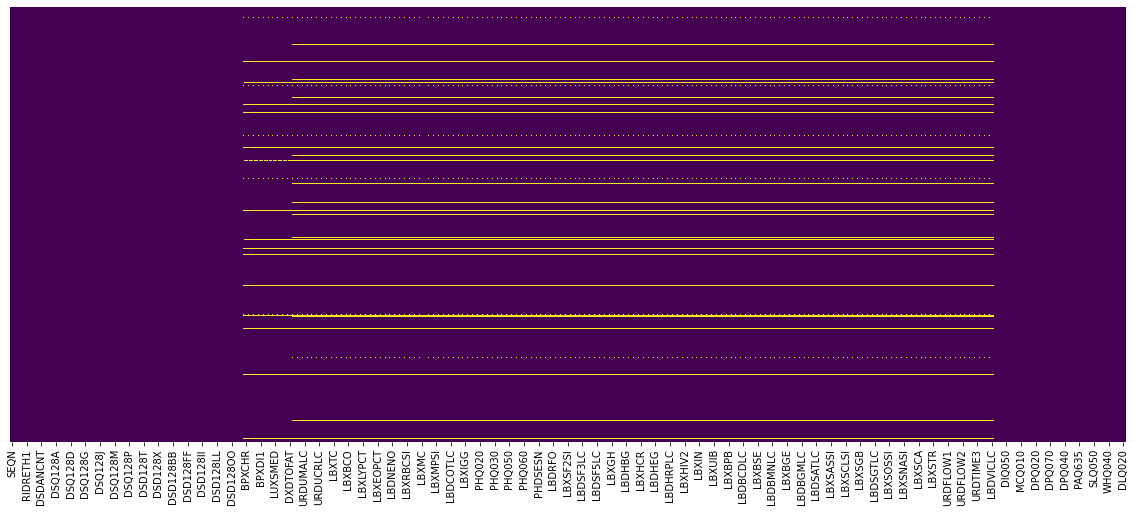

In [97]:
#Figure showing all of the null values present in the dataset for each attribute.
plt.figure(figsize=(20,8))
sns.heatmap(df_final.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [98]:
imputer = KNNImputer(n_neighbors=5)
df_final = pd.DataFrame(imputer.fit_transform(df_final),columns = df_final.columns)
df_final.head()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDHHSIZ,DSDCOUNT,DSDANCNT,DSD010,DSD010AN,DSQ128A,DSQ128B,DSQ128C,DSQ128D,DSQ128E,DSQ128F,DSQ128G,DSQ128H,DSQ128I,DSQ128J,DSQ128K,DSQ128L,DSQ128M,DSQ128N,DSQ128O,DSQ128P,DSQ128Q,DSQ128R,DSD128T,DSD128V,DSD128W,DSD128X,DSD128Z,DSD128AA,DSD128BB,DSD128DD,DSD128EE,DSD128FF,DSD128GG,DSD128HH,DSD128II,...,LBXSTR,LBXSUA,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDTIME3,URXPREG,LBXVIC,LBDVICLC,BPQ080,BPQ020,DIQ050,DIQ010,KIQ022,MCQ010,MCQ053,DPQ010,DPQ020,DPQ090,DPQ080,DPQ070,DPQ060,DPQ050,DPQ040,DPQ030,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ120,WHQ030,WHQ040,WHQ190,DLQ040,DLQ020
0,93703.0,2.0,2.0,5.0,5.0,1.000000e+00,5.397605e-79,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022912,0.310490,0.188571,0.016502,0.182764,0.156659,0.055175,0.578109,0.390270,0.317949,0.5,0.101915,0.0,3.0,1.4,2.0,2.0,1.8,2.0,2.0,2.000000e-01,2.000000e-01,5.397605e-79,5.397605e-79,2.000000e-01,2.000000e-01,5.397605e-79,4.000000e-01,1.000000e+00,1.6,1.6,1.8,2.0,1.8,1.800000e+00,2.6,2.8,2.0,2.0,2.0
1,93704.0,1.0,2.0,3.0,4.0,5.397605e-79,5.397605e-79,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.026915,0.258741,0.311648,0.038619,0.133903,0.167043,0.061569,0.544279,0.320000,0.305983,0.4,0.086550,0.0,3.0,1.4,2.0,2.0,1.8,2.0,2.0,2.000000e-01,2.000000e-01,5.397605e-79,5.397605e-79,2.000000e-01,2.000000e-01,5.397605e-79,4.000000e-01,1.000000e+00,1.6,1.6,1.8,2.0,1.8,1.800000e+00,2.6,2.8,2.0,2.0,2.0
2,93705.0,2.0,66.0,4.0,1.0,8.000000e+00,5.397605e-79,1.0,2.0,10.0,0.0,0.0,13.0,14.0,0.0,16.0,17.0,18.0,0.0,20.0,0.0,22.0,0.0,24.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024155,0.349650,0.545055,0.022717,0.145299,0.139503,0.080122,0.432836,0.140000,0.261538,0.5,0.087716,0.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,5.397605e-79,1.0,3.0,2.0,2.0,2.0
3,93706.0,1.0,18.0,5.0,5.0,5.397605e-79,5.397605e-79,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023119,0.503497,0.767033,0.031585,0.139459,0.314221,0.180564,0.366169,0.295676,0.362393,1.0,0.075370,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,1.0,2.0,1.0,2.0,1.000000e+00,3.0,3.0,2.0,2.0,2.0
4,93707.0,1.0,13.0,5.0,-1.0,5.397605e-79,5.397605e-79,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029331,0.328671,0.219780,0.009925,0.133903,0.319639,0.165755,0.382090,0.158378,0.167521,0.6,0.031676,0.0,1.8,1.8,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-01,5.397605e-79,5.397605e-79,6.000000e-01,6.000000e-01,5.397605e-79,1.6,1.6,1.8,2.0,2.0,1.600000e+00,2.2,2.0,2.0,2.0,2.0


## Individual merged datasets with respect to each disease target value.

In [99]:
def manage_duplicates(dataset, target):
  new_data = dataset.groupby(['SEQN', target], sort=True).mean().reset_index()
  new_data = new_data.replace({0.5: 1})
  new_data = new_data.astype(int)
  new_data = new_data.drop_duplicates(subset=['SEQN'], keep='last')
  new_data = new_data.loc[:,(new_data != 0).any(axis=0)]
  return new_data

## Hypertension dataset.

In [100]:
df_hypertension = pd.concat([df_medication_drugs, df_medication['Disease_hypertension']], axis=1)
df_hypertension = df_hypertension.reset_index(drop=True)

In [101]:
df_hypertension.head()

,SEQN,RXQSEEN,RXDDAYS,DRUG_ACARBOSE,DRUG_ACEBUTOLOL,DRUG_ALBIGLUTIDE,DRUG_ALLOPURINOL,DRUG_ALOGLIPTIN,DRUG_ALOGLIPTIN; PIOGLITAZONE,DRUG_ALPRAZOLAM,DRUG_AMIODARONE,DRUG_AMITRIPTYLINE,DRUG_AMLODIPINE,DRUG_AMLODIPINE; BENAZEPRIL,DRUG_AMLODIPINE; HYDROCHLOROTHIAZIDE; OLMESARTAN,DRUG_AMLODIPINE; OLMESARTAN,DRUG_AMLODIPINE; VALSARTAN,DRUG_ANTIHYPERLIPIDEMIC AGENTS - UNSPECIFIED,DRUG_ANTIHYPERTENSIVE AGENTS - UNSPECIFIED,DRUG_ARIPIPRAZOLE,DRUG_ATENOLOL,DRUG_ATENOLOL; CHLORTHALIDONE,DRUG_ATORVASTATIN,DRUG_AZILSARTAN; CHLORTHALIDONE,DRUG_BENAZEPRIL,DRUG_BENAZEPRIL; HYDROCHLOROTHIAZIDE,DRUG_BENZTROPINE,DRUG_BISOPROLOL,DRUG_BISOPROLOL; HYDROCHLOROTHIAZIDE,DRUG_BUMETANIDE,DRUG_BUPROPION,DRUG_BUSPIRONE,DRUG_CANAGLIFLOZIN,DRUG_CANAGLIFLOZIN; METFORMIN,DRUG_CANDESARTAN,DRUG_CANDESARTAN; HYDROCHLOROTHIAZIDE,DRUG_CARVEDILOL,DRUG_CHLORDIAZEPOXIDE; CLIDINIUM,DRUG_CHLORTHALIDONE,DRUG_CHOLESTYRAMINE,...,DRUG_OMEGA-3 POLYUNSATURATED FATTY ACIDS,DRUG_OMEPRAZOLE,DRUG_PALIPERIDONE,DRUG_PANTOPRAZOLE,DRUG_PAROXETINE,DRUG_PIOGLITAZONE,DRUG_PITAVASTATIN,DRUG_POTASSIUM CHLORIDE,DRUG_PRAVASTATIN,DRUG_PRAZOSIN,DRUG_PREDNISONE,DRUG_PREGABALIN,DRUG_PROPRANOLOL,DRUG_QUETIAPINE,DRUG_QUINAPRIL,DRUG_RABEPRAZOLE,DRUG_RAMIPRIL,DRUG_RANITIDINE,DRUG_REPAGLINIDE,DRUG_RISPERIDONE,DRUG_RIVAROXABAN,DRUG_ROSUVASTATIN,DRUG_SAXAGLIPTIN,DRUG_SERTRALINE,DRUG_SIMVASTATIN,DRUG_SITAGLIPTIN,DRUG_SOTALOL,DRUG_SPIRONOLACTONE,DRUG_SUCRALFATE,DRUG_TELMISARTAN,DRUG_TERAZOSIN,DRUG_TORSEMIDE,DRUG_TRAZODONE,DRUG_TRIAMTERENE,DRUG_VALSARTAN,DRUG_VENLAFAXINE,DRUG_VERAPAMIL,DRUG_VILAZODONE,DRUG_VORTIOXETINE,Disease_hypertension
0,93705.0,1.0,5475.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,93708.0,2.0,1460.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,93708.0,2.0,3650.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,93708.0,2.0,3650.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,93709.0,1.0,365.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [102]:
list_unique = df_hypertension['SEQN'].duplicated()
list_unique.value_counts()
#Around 3343 duplicated items, so at the end we will get 2423 instances.

True     3343
False    2423
Name: SEQN, dtype: int64

In [103]:
df_hypertension = manage_duplicates(df_hypertension,'Disease_hypertension')

In [104]:
df_hypertension = pd.merge(df_hypertension, df_final, how = 'left')
df_hypertension.head()

,SEQN,Disease_hypertension,RXQSEEN,RXDDAYS,DRUG_ALLOPURINOL,DRUG_ALPRAZOLAM,DRUG_AMITRIPTYLINE,DRUG_AMLODIPINE,DRUG_AMLODIPINE; BENAZEPRIL,DRUG_AMLODIPINE; HYDROCHLOROTHIAZIDE; OLMESARTAN,DRUG_AMLODIPINE; OLMESARTAN,DRUG_AMLODIPINE; VALSARTAN,DRUG_ANTIHYPERTENSIVE AGENTS - UNSPECIFIED,DRUG_ARIPIPRAZOLE,DRUG_ATENOLOL,DRUG_ATENOLOL; CHLORTHALIDONE,DRUG_ATORVASTATIN,DRUG_AZILSARTAN; CHLORTHALIDONE,DRUG_BENAZEPRIL,DRUG_BENAZEPRIL; HYDROCHLOROTHIAZIDE,DRUG_BENZTROPINE,DRUG_BISOPROLOL,DRUG_BUPROPION,DRUG_BUSPIRONE,DRUG_CANAGLIFLOZIN,DRUG_CANAGLIFLOZIN; METFORMIN,DRUG_CANDESARTAN,DRUG_CANDESARTAN; HYDROCHLOROTHIAZIDE,DRUG_CARVEDILOL,DRUG_CHLORDIAZEPOXIDE; CLIDINIUM,DRUG_CHLORTHALIDONE,DRUG_CHOLESTYRAMINE,DRUG_CITALOPRAM,DRUG_CLOMIPRAMINE,DRUG_CLONAZEPAM,DRUG_CLONIDINE,DRUG_COLESTIPOL,DRUG_DESVENLAFAXINE,DRUG_DEXLANSOPRAZOLE,DRUG_DILTIAZEM,...,LBXSTR,LBXSUA,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDTIME3,URXPREG,LBXVIC,LBDVICLC,BPQ080,BPQ020,DIQ050,DIQ010,KIQ022,MCQ010,MCQ053,DPQ010,DPQ020,DPQ090,DPQ080,DPQ070,DPQ060,DPQ050,DPQ040,DPQ030,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ120,WHQ030,WHQ040,WHQ190,DLQ040,DLQ020
0,93705,1,1,5475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.024155,0.349650,0.545055,0.022717,0.145299,0.139503,0.080122,0.432836,0.140000,0.261538,0.5,0.087716,0.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,5.397605e-79,1.0,3.0,2.0,2.0,2.0
1,93708,1,2,2555,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.016218,0.258741,0.032967,0.009434,0.019943,0.227991,0.161864,0.268657,0.332432,0.241026,0.8,0.102807,0.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,2.000000e+00,3.0,3.0,2.0,2.0,2.0
2,93709,1,1,365,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.036922,0.377622,0.024176,0.002019,0.071937,0.029345,0.018721,0.318408,0.243784,0.225641,1.0,0.027835,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-01,2.000000e-01,6.000000e-01,4.000000e-01,1.600000e+00,8.000000e-01,1.0,2.0,2.0,2.0,2.0,1.000000e+00,1.0,2.0,2.0,2.0,2.0
3,93714,0,1,4015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.031056,0.398601,0.334066,0.011698,0.173077,0.087133,0.072087,0.225871,0.135676,0.393162,0.9,0.053832,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,2.0,2.0,2.0,2.0,1.0,3.000000e+00,1.0,2.0,2.0,2.0,2.0
4,93715,0,1,4015,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.033816,0.307692,0.175824,0.012264,0.086182,0.144018,0.085759,0.389055,0.135676,0.393162,0.6,0.059182,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,3.000000e+00,1.0,1.0,1.0,2.0,1.0,4.000000e+00,3.0,3.0,2.0,1.0,1.0


In [105]:
df_hypertension.shape

(2423, 374)

In [106]:
df_hypertension.rename(columns = {'Disease_hypertension' : 'Target'}, inplace = True)

In [107]:
df_hypertension.to_csv('MergedData/HypertensionData.csv', index = False, header=True)

In [108]:
df_hypertension['Target'].value_counts()

1    1646
0     777
Name: Target, dtype: int64

## Diabetes dataset.

In [109]:
### Diabetes Data ###
df_diabetes = pd.concat([df_medication_drugs, df_medication['Disease_diabetes']], axis=1)
df_diabetes = df_diabetes.reset_index(drop=True)

In [110]:
df_diabetes = manage_duplicates(df_diabetes,'Disease_diabetes')

In [111]:
df_diabetes = pd.merge(df_diabetes, df_final, how = 'left')
df_diabetes.head()

,SEQN,Disease_diabetes,RXQSEEN,RXDDAYS,DRUG_ACARBOSE,DRUG_ALBIGLUTIDE,DRUG_ALLOPURINOL,DRUG_ALOGLIPTIN,DRUG_ALPRAZOLAM,DRUG_AMITRIPTYLINE,DRUG_AMLODIPINE,DRUG_AMLODIPINE; BENAZEPRIL,DRUG_AMLODIPINE; HYDROCHLOROTHIAZIDE; OLMESARTAN,DRUG_AMLODIPINE; OLMESARTAN,DRUG_AMLODIPINE; VALSARTAN,DRUG_ANTIHYPERLIPIDEMIC AGENTS - UNSPECIFIED,DRUG_ANTIHYPERTENSIVE AGENTS - UNSPECIFIED,DRUG_ARIPIPRAZOLE,DRUG_ATENOLOL,DRUG_ATENOLOL; CHLORTHALIDONE,DRUG_ATORVASTATIN,DRUG_AZILSARTAN; CHLORTHALIDONE,DRUG_BENAZEPRIL,DRUG_BENAZEPRIL; HYDROCHLOROTHIAZIDE,DRUG_BENZTROPINE,DRUG_BISOPROLOL,DRUG_BUPROPION,DRUG_BUSPIRONE,DRUG_CANAGLIFLOZIN,DRUG_CANAGLIFLOZIN; METFORMIN,DRUG_CANDESARTAN; HYDROCHLOROTHIAZIDE,DRUG_CARVEDILOL,DRUG_CHLORDIAZEPOXIDE; CLIDINIUM,DRUG_CHLORTHALIDONE,DRUG_CHOLESTYRAMINE,DRUG_CITALOPRAM,DRUG_CLOMIPRAMINE,DRUG_CLONAZEPAM,DRUG_CLONIDINE,DRUG_COLESEVELAM,...,LBXSTR,LBXSUA,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDTIME3,URXPREG,LBXVIC,LBDVICLC,BPQ080,BPQ020,DIQ050,DIQ010,KIQ022,MCQ010,MCQ053,DPQ010,DPQ020,DPQ090,DPQ080,DPQ070,DPQ060,DPQ050,DPQ040,DPQ030,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ120,WHQ030,WHQ040,WHQ190,DLQ040,DLQ020
0,93705,0,1,5475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.024155,0.349650,0.545055,0.022717,0.145299,0.139503,0.080122,0.432836,0.140000,0.261538,0.5,0.087716,0.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,5.397605e-79,1.0,3.0,2.0,2.0,2.0
1,93708,0,2,2920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.016218,0.258741,0.032967,0.009434,0.019943,0.227991,0.161864,0.268657,0.332432,0.241026,0.8,0.102807,0.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,2.000000e+00,3.0,3.0,2.0,2.0,2.0
2,93709,0,1,2007,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.036922,0.377622,0.024176,0.002019,0.071937,0.029345,0.018721,0.318408,0.243784,0.225641,1.0,0.027835,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-01,2.000000e-01,6.000000e-01,4.000000e-01,1.600000e+00,8.000000e-01,1.0,2.0,2.0,2.0,2.0,1.000000e+00,1.0,2.0,2.0,2.0,2.0
3,93714,1,1,4015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.031056,0.398601,0.334066,0.011698,0.173077,0.087133,0.072087,0.225871,0.135676,0.393162,0.9,0.053832,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,2.0,2.0,2.0,2.0,1.0,3.000000e+00,1.0,2.0,2.0,2.0,2.0
4,93715,0,1,4015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.033816,0.307692,0.175824,0.012264,0.086182,0.144018,0.085759,0.389055,0.135676,0.393162,0.6,0.059182,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,3.000000e+00,1.0,1.0,1.0,2.0,1.0,4.000000e+00,3.0,3.0,2.0,1.0,1.0


In [112]:
df_diabetes.shape

(2423, 383)

In [113]:
df_diabetes.rename(columns = {'Disease_diabetes' : 'Target'}, inplace = True)

In [114]:
df_diabetes.to_csv('MergedData/DiabetesData.csv', index = False, header=True)

In [115]:
df_diabetes['Target'].value_counts()

0    1704
1     719
Name: Target, dtype: int64

## Hypercholesterolemia dataset.

In [116]:
df_hypercholesterolemia = pd.concat([df_medication_drugs, df_medication['Disease_Pure hypercholesterolemia']], axis=1)
df_hypercholesterolemia = df_hypercholesterolemia.reset_index(drop=True)

In [117]:
df_hypercholesterolemia = manage_duplicates(df_hypercholesterolemia, 'Disease_Pure hypercholesterolemia')

In [118]:
df_hypercholesterolemia = pd.merge(df_hypercholesterolemia, df_final, how = 'left')
df_hypercholesterolemia.head()

,SEQN,Disease_Pure hypercholesterolemia,RXQSEEN,RXDDAYS,DRUG_ALLOPURINOL,DRUG_ALPRAZOLAM,DRUG_AMITRIPTYLINE,DRUG_AMLODIPINE,DRUG_AMLODIPINE; BENAZEPRIL,DRUG_AMLODIPINE; HYDROCHLOROTHIAZIDE; OLMESARTAN,DRUG_AMLODIPINE; OLMESARTAN,DRUG_ANTIHYPERLIPIDEMIC AGENTS - UNSPECIFIED,DRUG_ANTIHYPERTENSIVE AGENTS - UNSPECIFIED,DRUG_ARIPIPRAZOLE,DRUG_ATENOLOL,DRUG_ATENOLOL; CHLORTHALIDONE,DRUG_ATORVASTATIN,DRUG_AZILSARTAN; CHLORTHALIDONE,DRUG_BENAZEPRIL,DRUG_BENAZEPRIL; HYDROCHLOROTHIAZIDE,DRUG_BENZTROPINE,DRUG_BISOPROLOL,DRUG_BUPROPION,DRUG_BUSPIRONE,DRUG_CANAGLIFLOZIN,DRUG_CANDESARTAN; HYDROCHLOROTHIAZIDE,DRUG_CARVEDILOL,DRUG_CHLORDIAZEPOXIDE; CLIDINIUM,DRUG_CHLORTHALIDONE,DRUG_CHOLESTYRAMINE,DRUG_CITALOPRAM,DRUG_CLOMIPRAMINE,DRUG_CLONAZEPAM,DRUG_CLONIDINE,DRUG_CLOPIDOGREL,DRUG_COLESEVELAM,DRUG_COLESTIPOL,DRUG_DESMOPRESSIN,DRUG_DESVENLAFAXINE,DRUG_DEXLANSOPRAZOLE,...,LBXSTR,LBXSUA,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDTIME3,URXPREG,LBXVIC,LBDVICLC,BPQ080,BPQ020,DIQ050,DIQ010,KIQ022,MCQ010,MCQ053,DPQ010,DPQ020,DPQ090,DPQ080,DPQ070,DPQ060,DPQ050,DPQ040,DPQ030,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ120,WHQ030,WHQ040,WHQ190,DLQ040,DLQ020
0,93705,0,1,5475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.024155,0.349650,0.545055,0.022717,0.145299,0.139503,0.080122,0.432836,0.140000,0.261538,0.5,0.087716,0.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,5.397605e-79,1.0,3.0,2.0,2.0,2.0
1,93708,1,2,3650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.016218,0.258741,0.032967,0.009434,0.019943,0.227991,0.161864,0.268657,0.332432,0.241026,0.8,0.102807,0.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,2.000000e+00,3.0,3.0,2.0,2.0,2.0
2,93709,0,1,2007,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.036922,0.377622,0.024176,0.002019,0.071937,0.029345,0.018721,0.318408,0.243784,0.225641,1.0,0.027835,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-01,2.000000e-01,6.000000e-01,4.000000e-01,1.600000e+00,8.000000e-01,1.0,2.0,2.0,2.0,2.0,1.000000e+00,1.0,2.0,2.0,2.0,2.0
3,93714,0,1,4015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.031056,0.398601,0.334066,0.011698,0.173077,0.087133,0.072087,0.225871,0.135676,0.393162,0.9,0.053832,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,2.0,2.0,2.0,2.0,1.0,3.000000e+00,1.0,2.0,2.0,2.0,2.0
4,93715,1,1,7300,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.033816,0.307692,0.175824,0.012264,0.086182,0.144018,0.085759,0.389055,0.135676,0.393162,0.6,0.059182,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,3.000000e+00,1.0,1.0,1.0,2.0,1.0,4.000000e+00,3.0,3.0,2.0,1.0,1.0


In [119]:
df_hypercholesterolemia.shape

(2423, 366)

In [120]:
df_hypercholesterolemia.rename(columns = {'Disease_Pure hypercholesterolemia' : 'Target'}, inplace = True)

In [121]:
df_hypercholesterolemia.to_csv('MergedData/HypercholesterolemiaData.csv', index = False, header=True)

In [122]:
df_hypercholesterolemia['Target'].value_counts()

0    1297
1    1126
Name: Target, dtype: int64

In [123]:
###  Depressive disorder Data
df_depressive_disorder = pd.concat([df_medication_drugs, df_medication['Disease_depressive disorder']], axis=1)
df_depressive_disorder = df_depressive_disorder.reset_index(drop=True)

In [124]:
df_depressive_disorder = manage_duplicates(df_depressive_disorder, 'Disease_depressive disorder')

In [125]:
df_depressive_disorder = pd.merge(df_depressive_disorder, df_final, how = 'left')
df_depressive_disorder.head()

,SEQN,Disease_depressive disorder,RXQSEEN,RXDDAYS,DRUG_ALLOPURINOL,DRUG_ALPRAZOLAM,DRUG_AMITRIPTYLINE,DRUG_AMLODIPINE,DRUG_AMLODIPINE; BENAZEPRIL,DRUG_AMLODIPINE; HYDROCHLOROTHIAZIDE; OLMESARTAN,DRUG_AMLODIPINE; OLMESARTAN,DRUG_AMLODIPINE; VALSARTAN,DRUG_ANTIHYPERLIPIDEMIC AGENTS - UNSPECIFIED,DRUG_ANTIHYPERTENSIVE AGENTS - UNSPECIFIED,DRUG_ARIPIPRAZOLE,DRUG_ATENOLOL,DRUG_ATENOLOL; CHLORTHALIDONE,DRUG_ATORVASTATIN,DRUG_AZILSARTAN; CHLORTHALIDONE,DRUG_BENAZEPRIL,DRUG_BENAZEPRIL; HYDROCHLOROTHIAZIDE,DRUG_BENZTROPINE,DRUG_BISOPROLOL,DRUG_BUPROPION,DRUG_BUSPIRONE,DRUG_CANAGLIFLOZIN,DRUG_CANAGLIFLOZIN; METFORMIN,DRUG_CANDESARTAN; HYDROCHLOROTHIAZIDE,DRUG_CARVEDILOL,DRUG_CHLORDIAZEPOXIDE; CLIDINIUM,DRUG_CHLORTHALIDONE,DRUG_CHOLESTYRAMINE,DRUG_CITALOPRAM,DRUG_CLOMIPRAMINE,DRUG_CLONAZEPAM,DRUG_CLONIDINE,DRUG_COLESEVELAM,DRUG_COLESTIPOL,DRUG_DESMOPRESSIN,DRUG_DESVENLAFAXINE,...,LBXSTR,LBXSUA,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDTIME3,URXPREG,LBXVIC,LBDVICLC,BPQ080,BPQ020,DIQ050,DIQ010,KIQ022,MCQ010,MCQ053,DPQ010,DPQ020,DPQ090,DPQ080,DPQ070,DPQ060,DPQ050,DPQ040,DPQ030,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ120,WHQ030,WHQ040,WHQ190,DLQ040,DLQ020
0,93705,0,1,5475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.024155,0.349650,0.545055,0.022717,0.145299,0.139503,0.080122,0.432836,0.140000,0.261538,0.5,0.087716,0.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,5.397605e-79,1.0,3.0,2.0,2.0,2.0
1,93708,0,2,2920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.016218,0.258741,0.032967,0.009434,0.019943,0.227991,0.161864,0.268657,0.332432,0.241026,0.8,0.102807,0.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,2.000000e+00,3.0,3.0,2.0,2.0,2.0
2,93709,1,1,3650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.036922,0.377622,0.024176,0.002019,0.071937,0.029345,0.018721,0.318408,0.243784,0.225641,1.0,0.027835,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-01,2.000000e-01,6.000000e-01,4.000000e-01,1.600000e+00,8.000000e-01,1.0,2.0,2.0,2.0,2.0,1.000000e+00,1.0,2.0,2.0,2.0,2.0
3,93714,0,1,4015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.031056,0.398601,0.334066,0.011698,0.173077,0.087133,0.072087,0.225871,0.135676,0.393162,0.9,0.053832,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,2.0,2.0,2.0,2.0,1.0,3.000000e+00,1.0,2.0,2.0,2.0,2.0
4,93715,1,1,730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.033816,0.307692,0.175824,0.012264,0.086182,0.144018,0.085759,0.389055,0.135676,0.393162,0.6,0.059182,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,3.000000e+00,1.0,1.0,1.0,2.0,1.0,4.000000e+00,3.0,3.0,2.0,1.0,1.0


In [126]:
df_depressive_disorder.shape

(2423, 378)

In [127]:
df_depressive_disorder.rename(columns = {'Disease_depressive disorder' : 'Target'}, inplace = True)

In [128]:
df_depressive_disorder.to_csv('MergedData/DepressiveDisorderData.csv', index = False, header=True)

In [129]:
df_depressive_disorder['Target'].value_counts()

0    1990
1     433
Name: Target, dtype: int64

In [130]:
### Gastro-esophageal reflux disease data
df_Gastro_esophageal = pd.concat([df_medication_drugs, df_medication['Disease_Gastro-esophageal reflux disease']], axis=1)
df_Gastro_esophageal = df_Gastro_esophageal.reset_index(drop=True)

In [131]:
df_Gastro_esophageal = df_Gastro_esophageal.fillna(0)

In [132]:
df_Gastro_esophageal = manage_duplicates(df_Gastro_esophageal, 'Disease_Gastro-esophageal reflux disease')

In [133]:
df_Gastro_esophageal = pd.merge(df_Gastro_esophageal, df_final, how = 'left')
df_Gastro_esophageal.head()

,SEQN,Disease_Gastro-esophageal reflux disease,RXQSEEN,RXDDAYS,DRUG_ALLOPURINOL,DRUG_ALPRAZOLAM,DRUG_AMITRIPTYLINE,DRUG_AMLODIPINE,DRUG_AMLODIPINE; BENAZEPRIL,DRUG_AMLODIPINE; HYDROCHLOROTHIAZIDE; OLMESARTAN,DRUG_AMLODIPINE; OLMESARTAN,DRUG_AMLODIPINE; VALSARTAN,DRUG_ANTIHYPERLIPIDEMIC AGENTS - UNSPECIFIED,DRUG_ANTIHYPERTENSIVE AGENTS - UNSPECIFIED,DRUG_ARIPIPRAZOLE,DRUG_ATENOLOL,DRUG_ATENOLOL; CHLORTHALIDONE,DRUG_ATORVASTATIN,DRUG_AZILSARTAN; CHLORTHALIDONE,DRUG_BENAZEPRIL,DRUG_BENAZEPRIL; HYDROCHLOROTHIAZIDE,DRUG_BENZTROPINE,DRUG_BISOPROLOL,DRUG_BUPROPION,DRUG_BUSPIRONE,DRUG_CANAGLIFLOZIN,DRUG_CANAGLIFLOZIN; METFORMIN,DRUG_CANDESARTAN; HYDROCHLOROTHIAZIDE,DRUG_CARVEDILOL,DRUG_CHLORDIAZEPOXIDE; CLIDINIUM,DRUG_CHLORTHALIDONE,DRUG_CIMETIDINE,DRUG_CITALOPRAM,DRUG_CLOMIPRAMINE,DRUG_CLONAZEPAM,DRUG_CLONIDINE,DRUG_COLESEVELAM,DRUG_COLESTIPOL,DRUG_DESMOPRESSIN,DRUG_DESVENLAFAXINE,...,LBXSTR,LBXSUA,URXVOL1,URDFLOW1,URDTIME1,URXVOL2,URDFLOW2,URDTIME2,URXVOL3,URDTIME3,URXPREG,LBXVIC,LBDVICLC,BPQ080,BPQ020,DIQ050,DIQ010,KIQ022,MCQ010,MCQ053,DPQ010,DPQ020,DPQ090,DPQ080,DPQ070,DPQ060,DPQ050,DPQ040,DPQ030,PAQ620,PAQ635,PAQ650,PAQ665,SLQ050,SLQ120,WHQ030,WHQ040,WHQ190,DLQ040,DLQ020
0,93705,0,1,5475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.024155,0.349650,0.545055,0.022717,0.145299,0.139503,0.080122,0.432836,0.140000,0.261538,0.5,0.087716,0.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,5.397605e-79,1.0,3.0,2.0,2.0,2.0
1,93708,0,2,2920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.016218,0.258741,0.032967,0.009434,0.019943,0.227991,0.161864,0.268657,0.332432,0.241026,0.8,0.102807,0.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,1.0,2.0,2.000000e+00,3.0,3.0,2.0,2.0,2.0
2,93709,0,1,2007,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.036922,0.377622,0.024176,0.002019,0.071937,0.029345,0.018721,0.318408,0.243784,0.225641,1.0,0.027835,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e-01,2.000000e-01,6.000000e-01,4.000000e-01,1.600000e+00,8.000000e-01,1.0,2.0,2.0,2.0,2.0,1.000000e+00,1.0,2.0,2.0,2.0,2.0
3,93714,0,1,4015,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.031056,0.398601,0.334066,0.011698,0.173077,0.087133,0.072087,0.225871,0.135676,0.393162,0.9,0.053832,0.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,5.397605e-79,2.0,2.0,2.0,2.0,1.0,3.000000e+00,1.0,2.0,2.0,2.0,2.0
4,93715,0,1,4015,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.033816,0.307692,0.175824,0.012264,0.086182,0.144018,0.085759,0.389055,0.135676,0.393162,0.6,0.059182,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,1.000000e+00,3.000000e+00,1.0,1.0,1.0,2.0,1.0,4.000000e+00,3.0,3.0,2.0,1.0,1.0


In [134]:
df_Gastro_esophageal.shape

(2423, 372)

In [135]:
df_Gastro_esophageal.rename(columns = {'Disease_Gastro-esophageal reflux disease' : 'Target'}, inplace = True)

In [137]:
df_Gastro_esophageal.to_csv('MergedData/GastroEsophagealData.csv', index = False, header=True)

In [138]:
df_Gastro_esophageal['Target'].value_counts()

0    2013
1     410
Name: Target, dtype: int64